In [147]:
import pandas as pd
df=pd.read_csv('Healthcare Providers.csv')
df.head()

index  National Provider Identifier  \
0  8774979                    1891106191   
1  3354385                    1346202256   
2  3001884                    1306820956   
3  7594822                    1770523540   
4   746159                    1073627758   

  Last Name/Organization Name of the Provider First Name of the Provider  \
0                                 UPADHYAYULA                  SATYASREE   
1                                       JONES                      WENDY   
2                                    DUROCHER                    RICHARD   
3                                     FULLARD                     JASPER   
4                                    PERROTTI                    ANTHONY   

  Middle Initial of the Provider Credentials of the Provider  \
0                            NaN                        M.D.   
1                              P                        M.D.   
2                              W                         DPM   
3                            NaN                          MD   
4                              E                          DO   

  Gender of the Provider Entity Type of the Provider  \
0                      F                           I   
1                      F                           I   
2                      M                           I   
3                      M                           I   
4                      M                           I   

  Street Address 1 of the Provider Street Address 2 of the Provider  ...  \
0                1402 S GRAND BLVD                   FDT 14TH FLOOR  ...   
1                  2950 VILLAGE DR                              NaN  ...   
2                20 WASHINGTON AVE                          STE 212  ...   
3               5746 N BROADWAY ST                              NaN  ...   
4                 875 MILITARY TRL                        SUITE 200  ...   

  HCPCS Code                                  HCPCS Description  \
0      99223  Initial hospital inpatient care, typically 70 ...   
1      G0202  Screening mammography, bilateral (2-view study...   
2      99348  Established patient home visit, typically 25 m...   
3      81002                            Urinalysis, manual test   
4      96372  Injection beneath the skin or into muscle for ...   

  HCPCS Drug Indicator Number of Services Number of Medicare Beneficiaries  \
0                    N                 27                               24   
1                    N                175                              175   
2                    N                 32                               13   
3                    N                 20                               18   
4                    N                 33                               24   

  Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                                 27         
1                                                175         
2                                                 32         
3                                                 20         
4                                                 31         

  Average Medicare Allowed Amount Average Submitted Charge Amount  \
0                    200.58777778                    305.21111111   
1                          123.73                           548.8   
2                           90.65                             155   
3                             3.5                               5   
4                           26.52                              40   

  Average Medicare Payment Amount Average Medicare Standardized Amount  
0                    157.26222222                         160.90888889  
1                          118.83                         135.31525714  
2                      64.4396875                           60.5959375  
3                            3.43                                 3.43  
4                    19.539393939                         19.057575758  

[5 ro

In [148]:
df.shape

(100000, 27)

In [149]:
#Data Cleaning

In [150]:
df = df.drop(columns=['Street Address 2 of the Provider'])

In [151]:
df.isnull().sum()

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare Participation Indicator                                0
Place of S

In [152]:
df = df.dropna(subset=['First Name of the Provider'], how='all')

In [153]:
most_frequent_gender = df['Gender of the Provider'].mode()[0]
df['Gender of the Provider'] = df['Gender of the Provider'].fillna(most_frequent_gender)

In [154]:
df = df.drop_duplicates()

In [155]:
df.isnull().sum()

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                      0
Middle Initial of the Provider                              25076
Credentials of the Provider                                  2955
Gender of the Provider                                          0
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare Participation Indicator                                0
Place of S

In [156]:
df = df.drop(columns=['Middle Initial of the Provider'])
df = df.dropna(subset=['Credentials of the Provider'], how='all')
df.isnull().sum()

index                                                       0
National Provider Identifier                                0
Last Name/Organization Name of the Provider                 0
First Name of the Provider                                  0
Credentials of the Provider                                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Street Address 1 of the Provider                            0
City of the Provider                                        0
Zip Code of the Provider                                    0
State Code of the Provider                                  0
Country Code of the Provider                                0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                                            0
HCPCS Code                                                  0
HCPCS De

In [157]:
df.shape

(92790, 25)

In [158]:
numeric_columns = ['Number of Services', 'Number of Medicare Beneficiaries',
                   'Number of Distinct Medicare Beneficiary/Per Day Services',
                   'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
                   'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']

In [159]:
#Bivariate Analysis

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

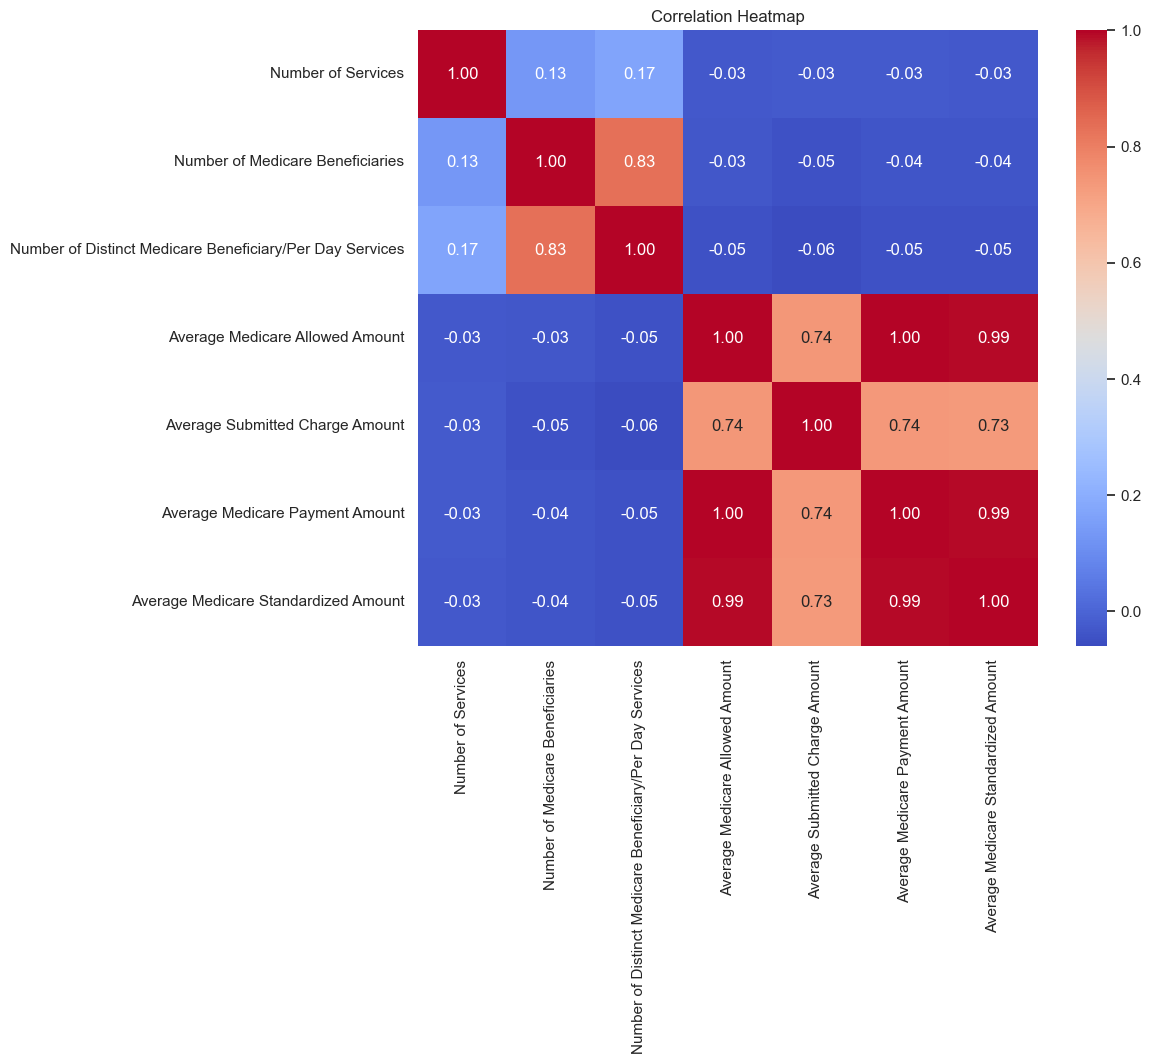

In [161]:
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

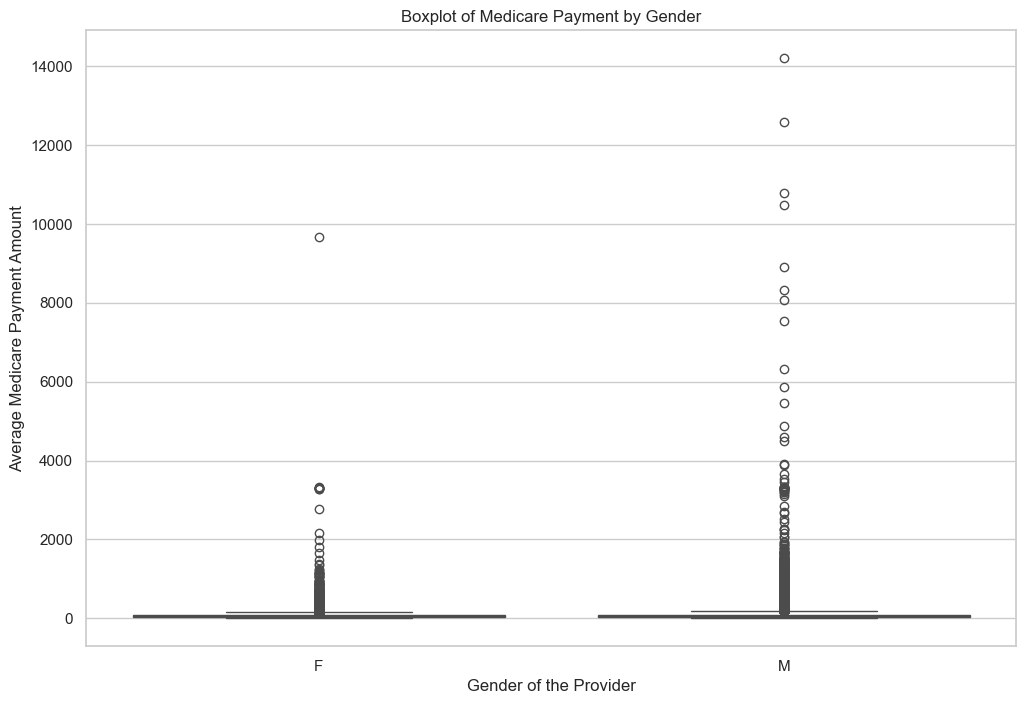

In [162]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Gender of the Provider', y='Average Medicare Payment Amount')
plt.title('Boxplot of Medicare Payment by Gender')
plt.show()

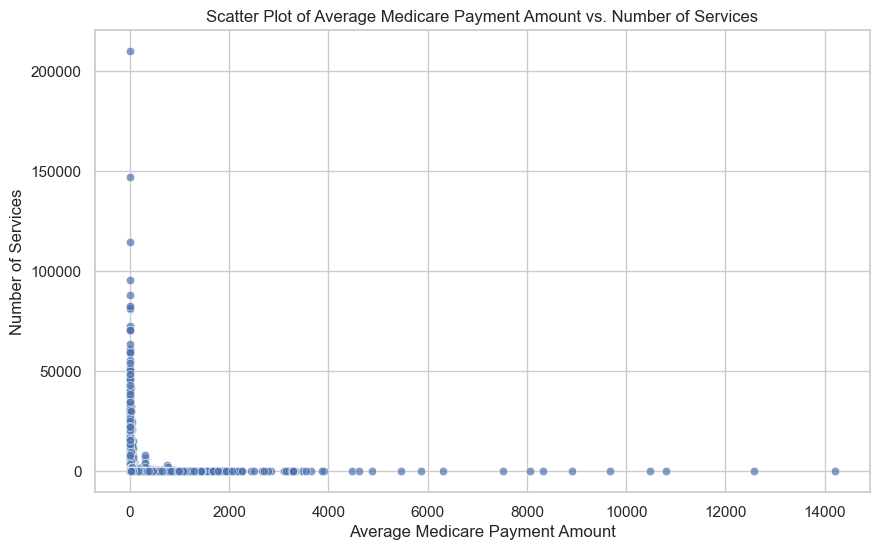

In [163]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Average Medicare Payment Amount', y='Number of Services', alpha=0.7)
plt.title('Scatter Plot of Average Medicare Payment Amount vs. Number of Services')
plt.xlabel('Average Medicare Payment Amount')
plt.ylabel('Number of Services')
plt.show()


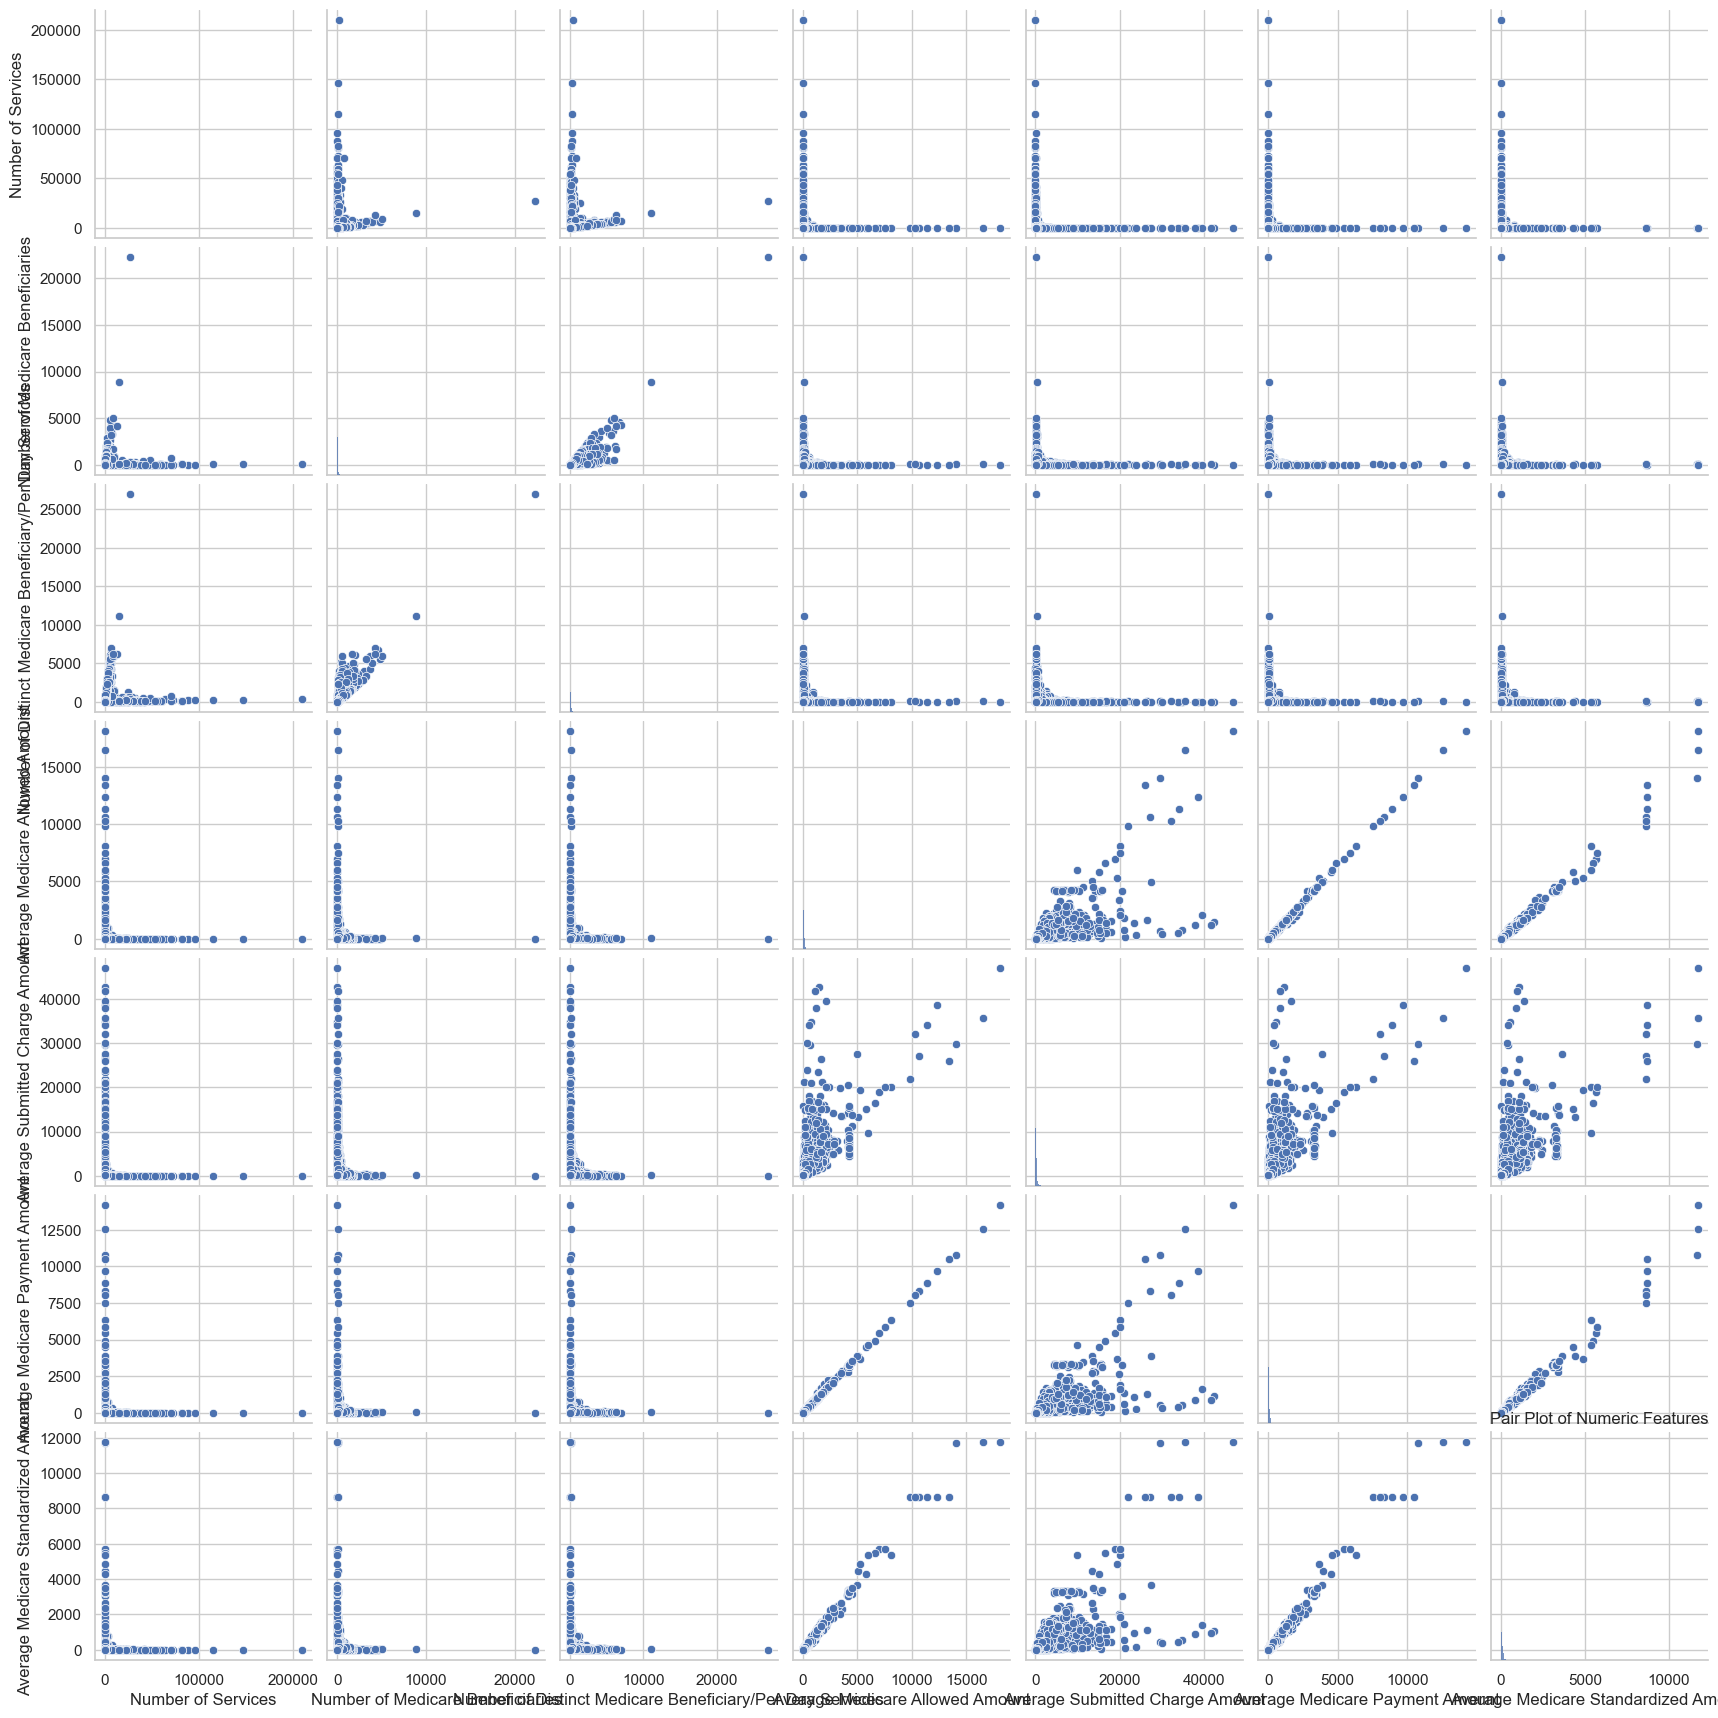

In [164]:
sns.pairplot(df[numeric_columns])
plt.title('Pair Plot of Numeric Features')
plt.show()


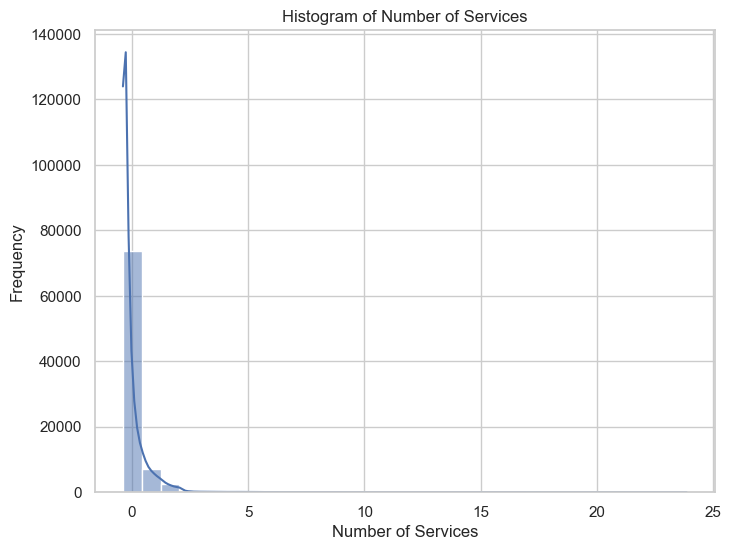

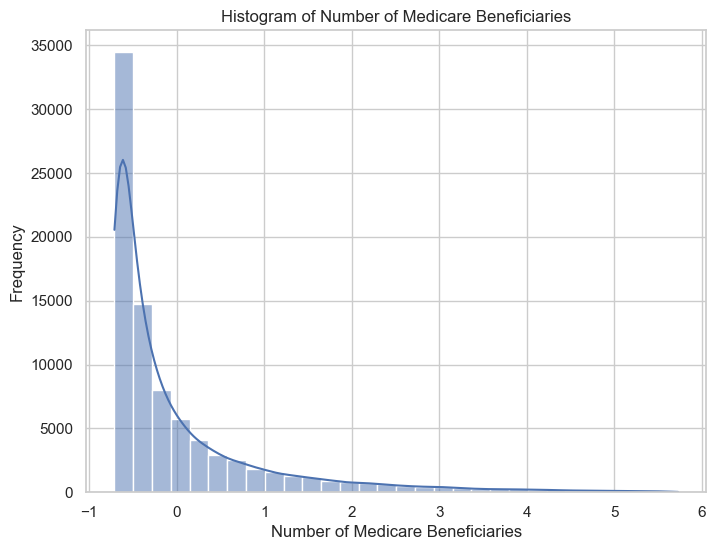

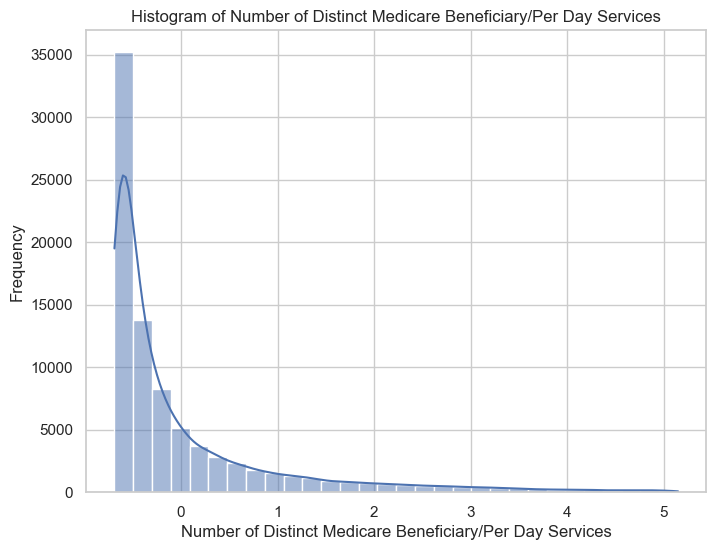

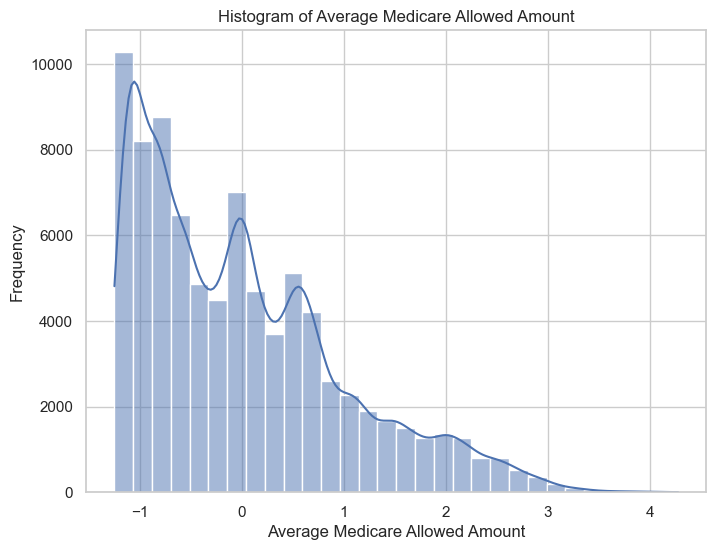

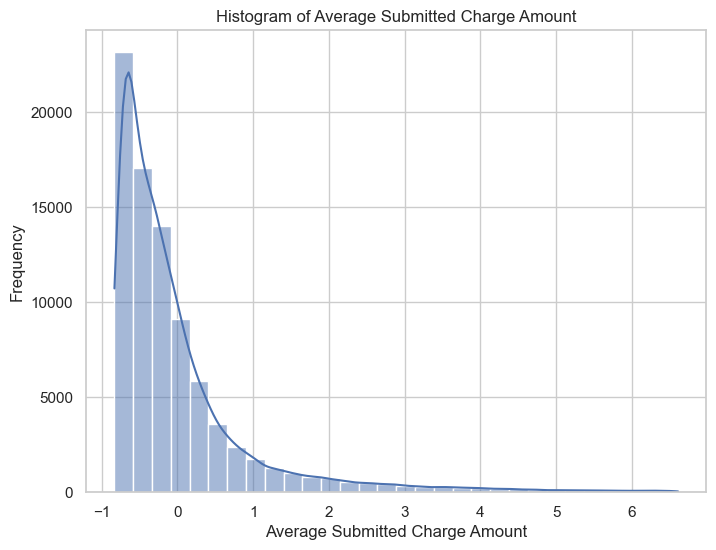

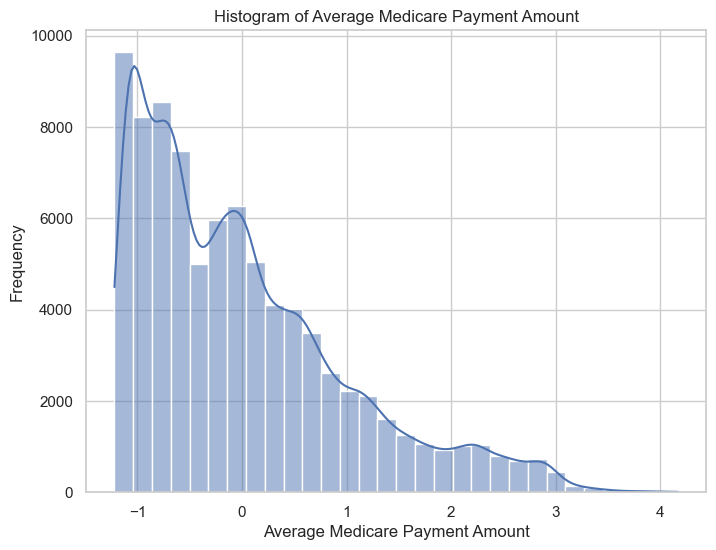

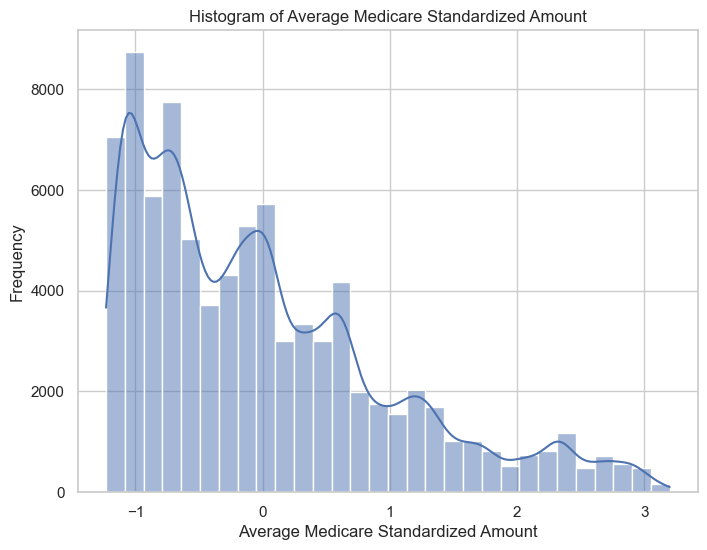

In [268]:

for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()  

In [166]:
#Univariate analysis

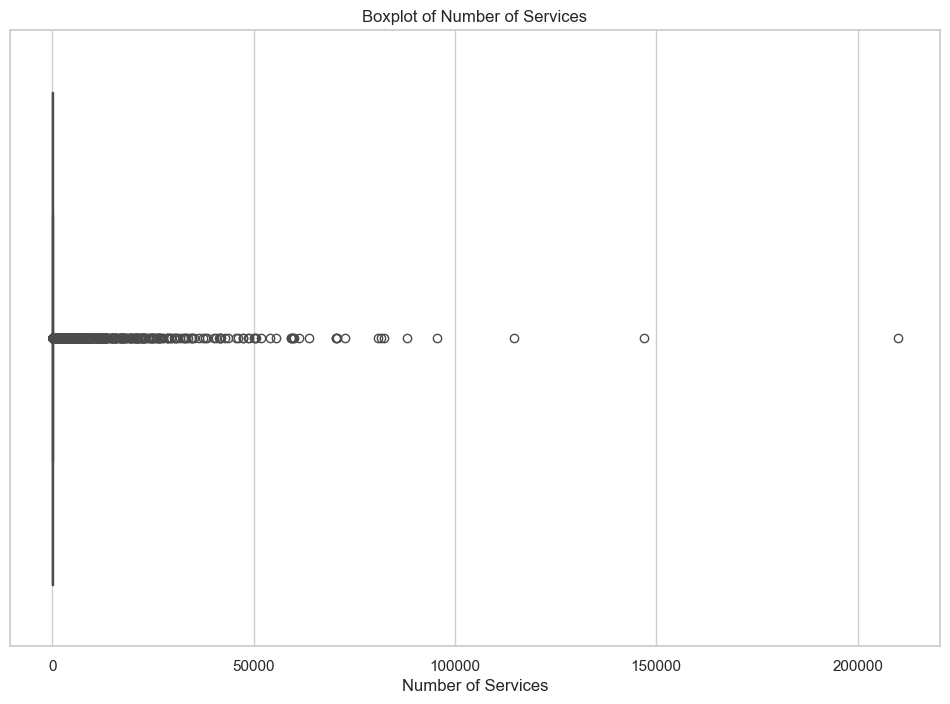

In [167]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Number of Services')
plt.title('Boxplot of Number of Services')
plt.show()

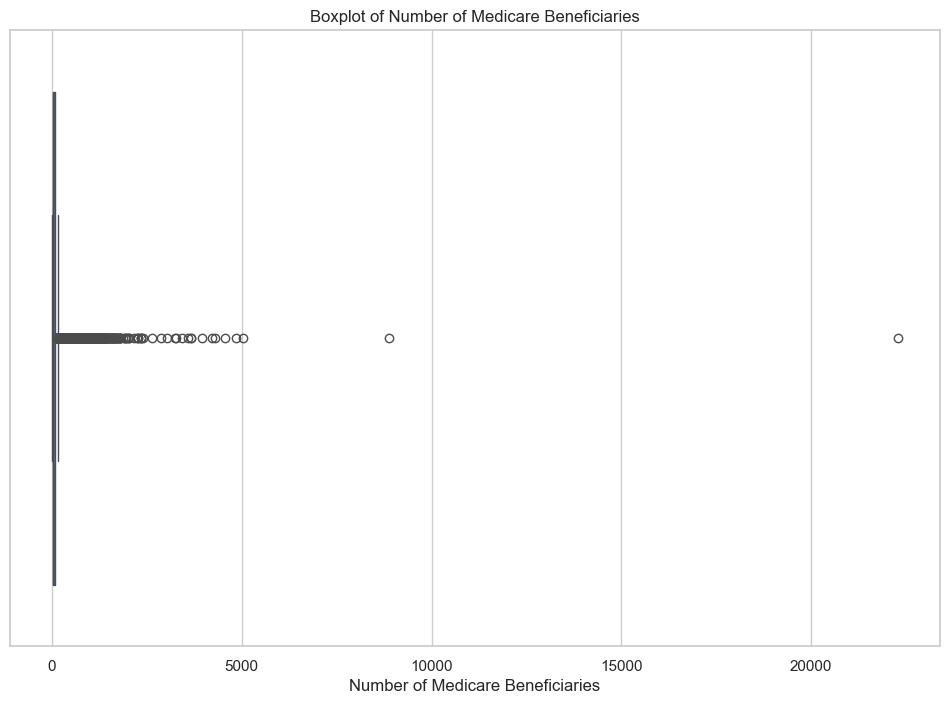

In [168]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Number of Medicare Beneficiaries')
plt.title('Boxplot of Number of Medicare Beneficiaries')
plt.show()

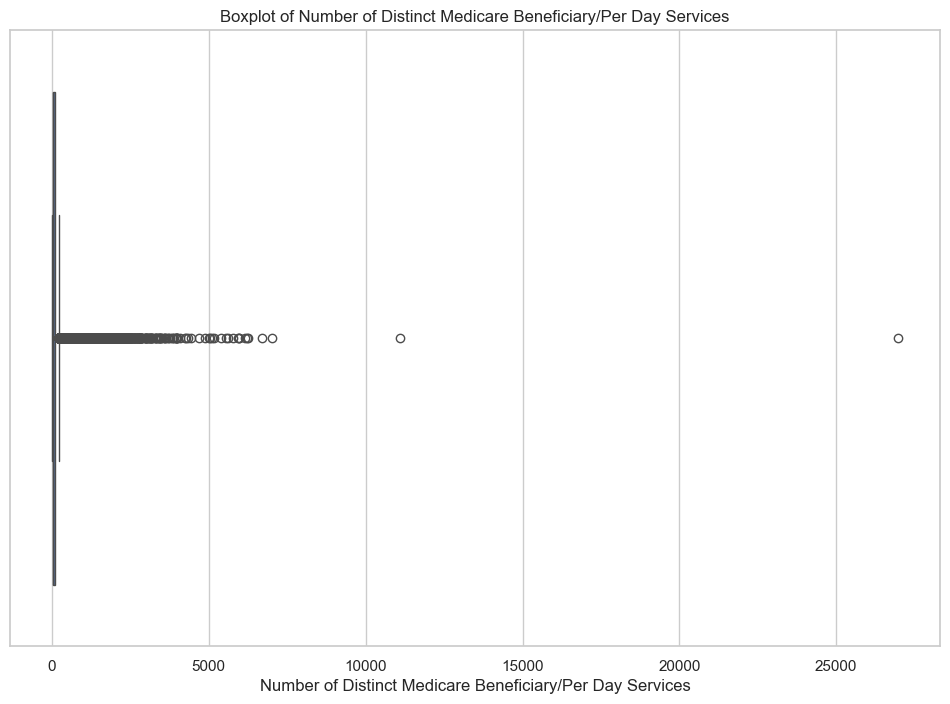

In [169]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Number of Distinct Medicare Beneficiary/Per Day Services')
plt.title('Boxplot of Number of Distinct Medicare Beneficiary/Per Day Services')
plt.show()

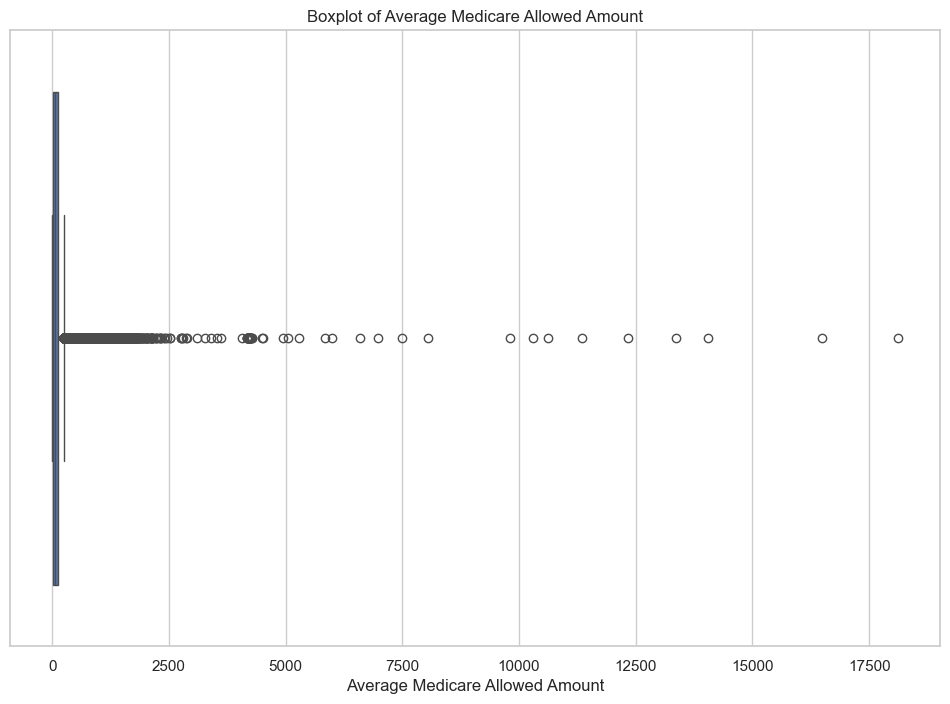

In [170]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Average Medicare Allowed Amount')
plt.title('Boxplot of Average Medicare Allowed Amount')
plt.show()

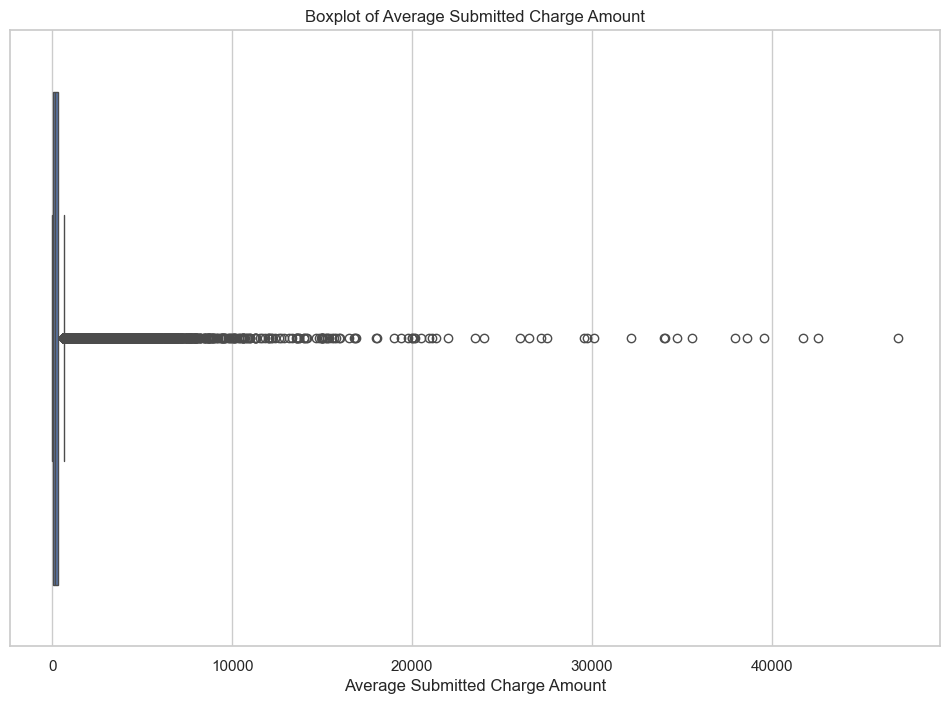

In [171]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Average Submitted Charge Amount')
plt.title('Boxplot of Average Submitted Charge Amount')
plt.show()

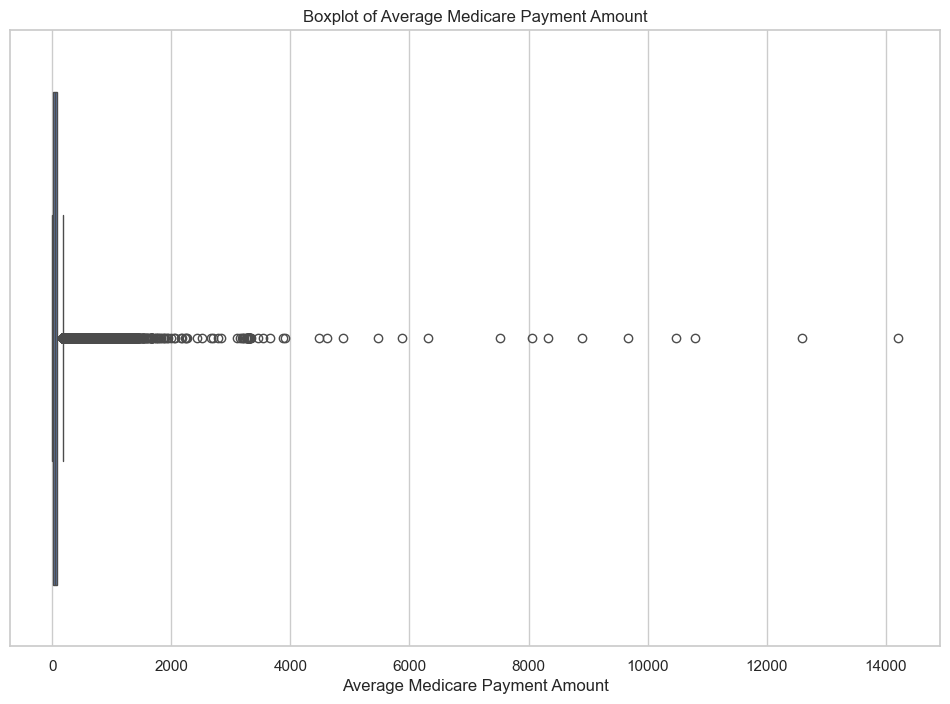

In [172]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Average Medicare Payment Amount')
plt.title('Boxplot of Average Medicare Payment Amount')
plt.show()

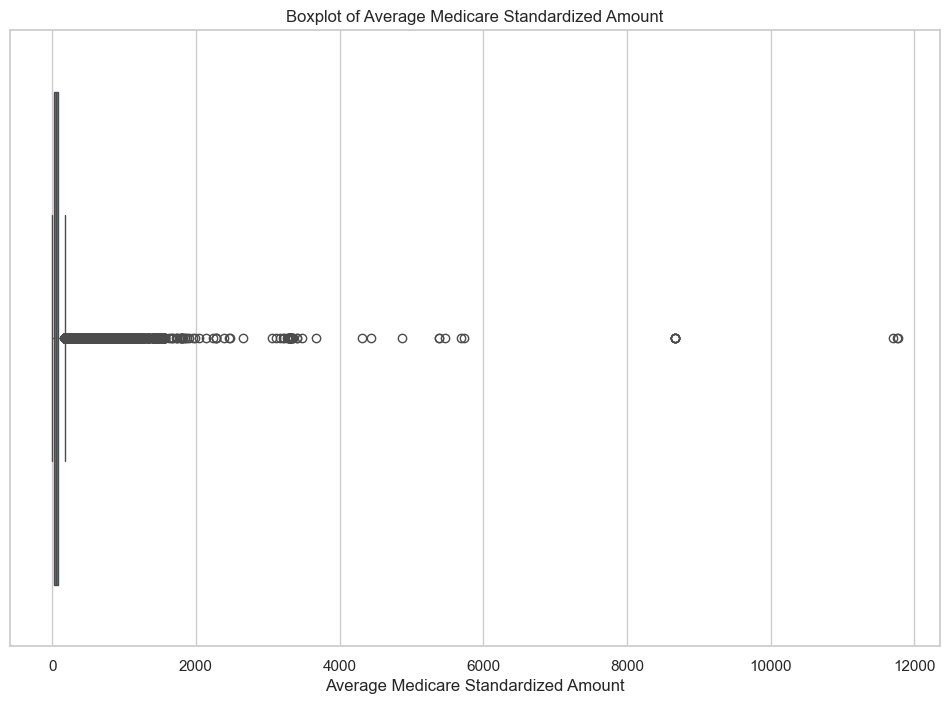

In [173]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Average Medicare Standardized Amount')
plt.title('Boxplot of Average Medicare Standardized Amount')
plt.show()

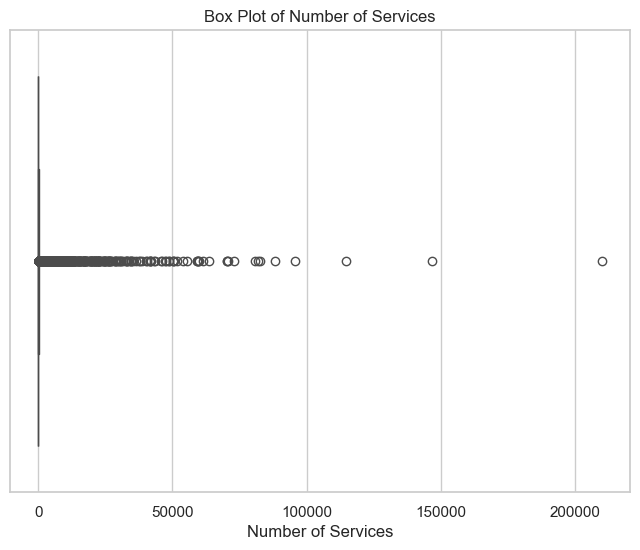

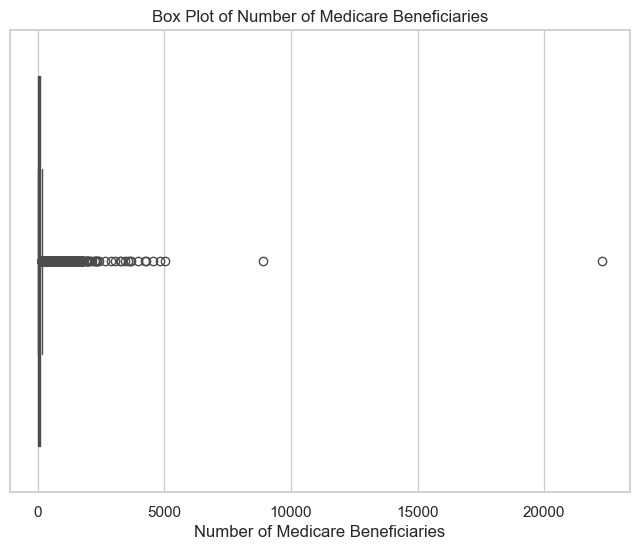

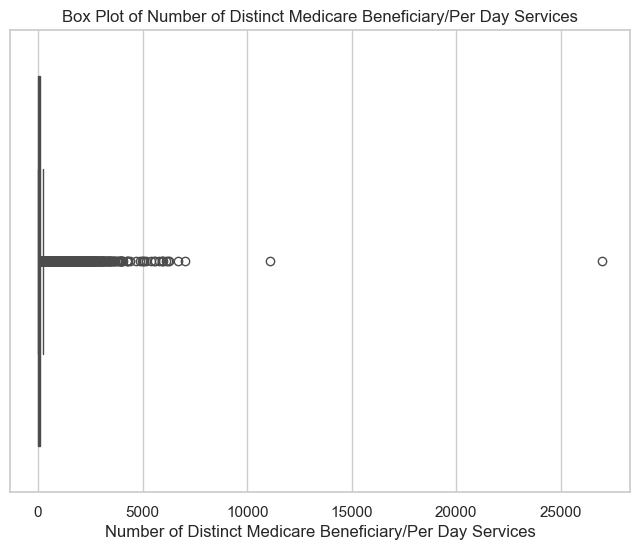

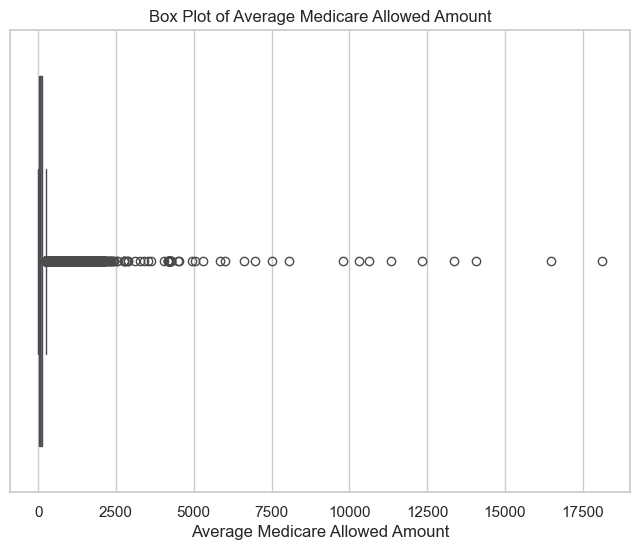

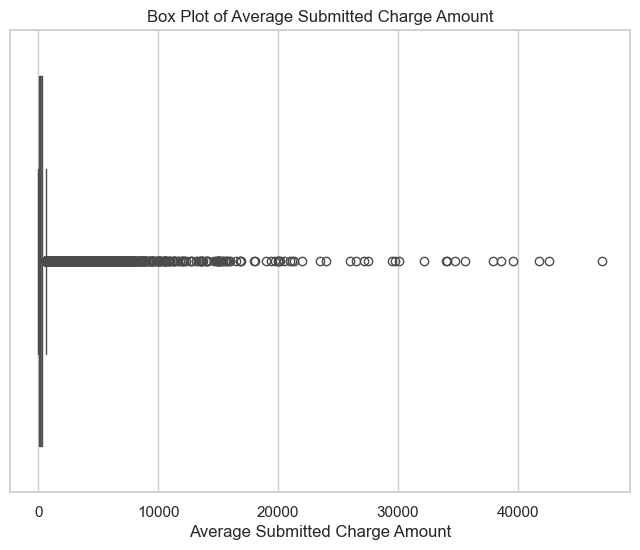

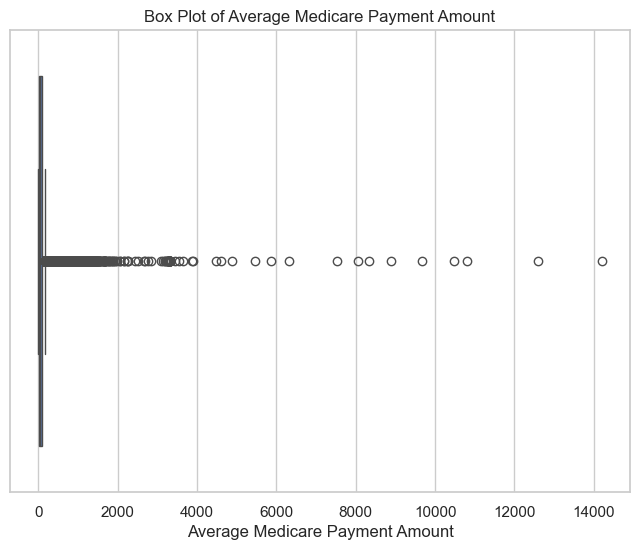

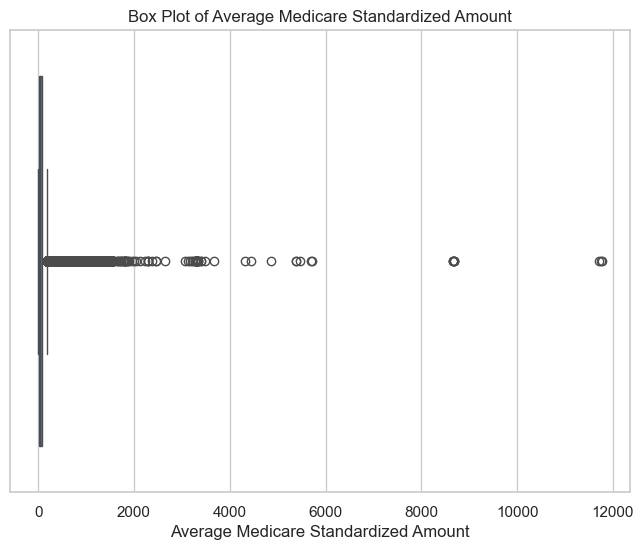

In [174]:
for col in numeric_columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Box Plot of {col}')
  plt.xlabel(col)
  plt.show()

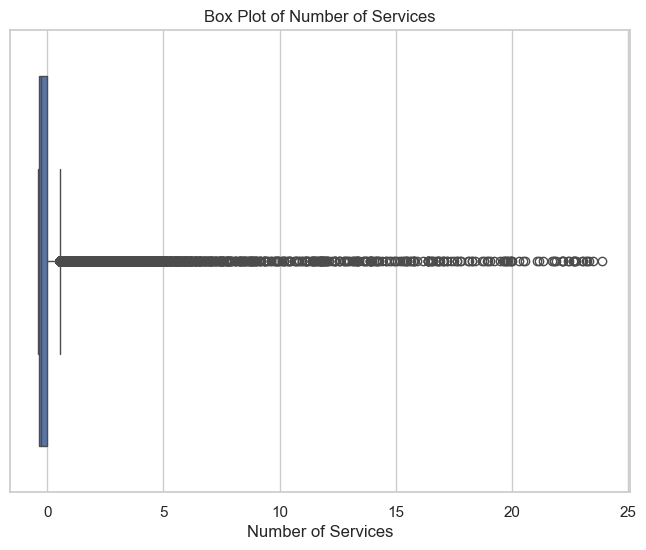

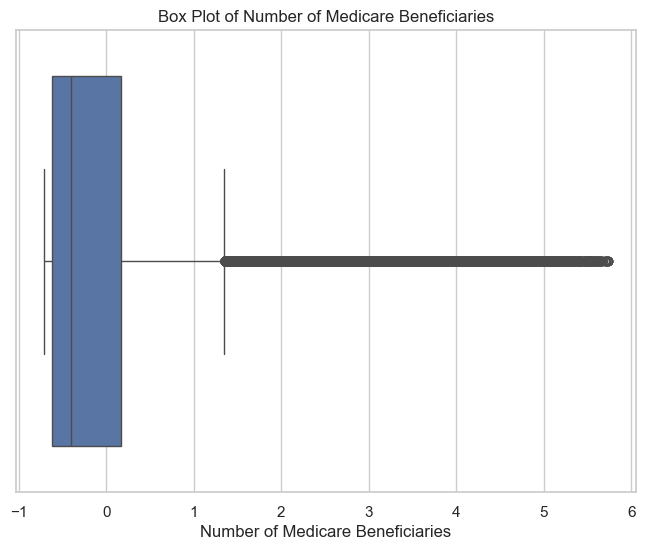

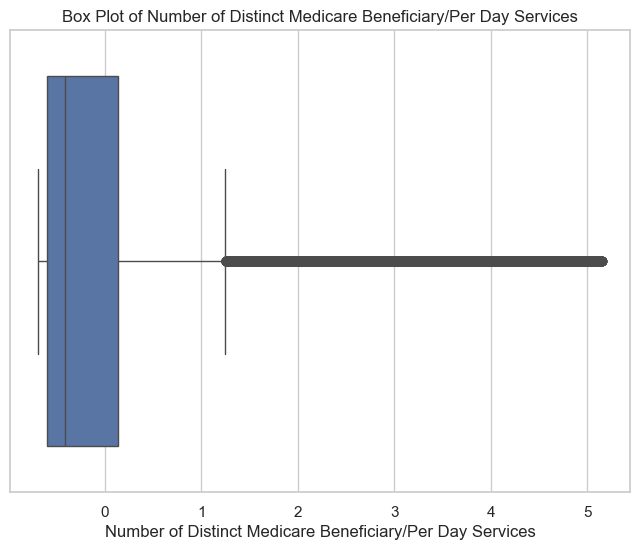

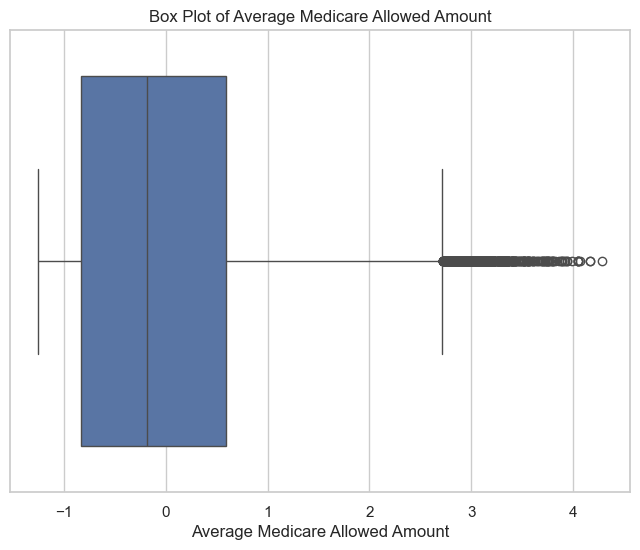

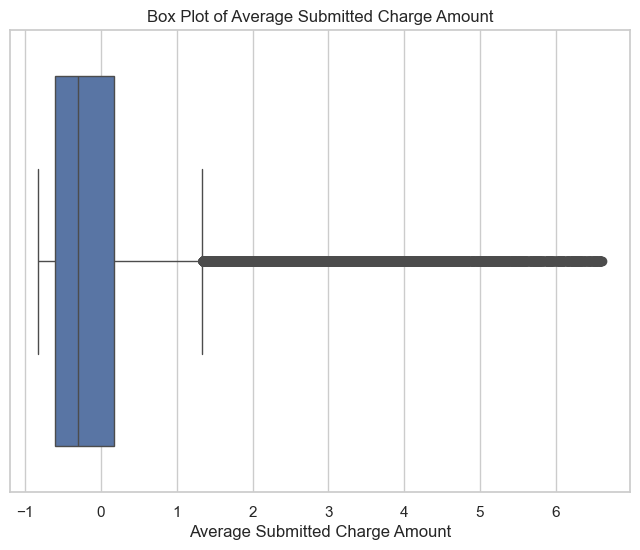

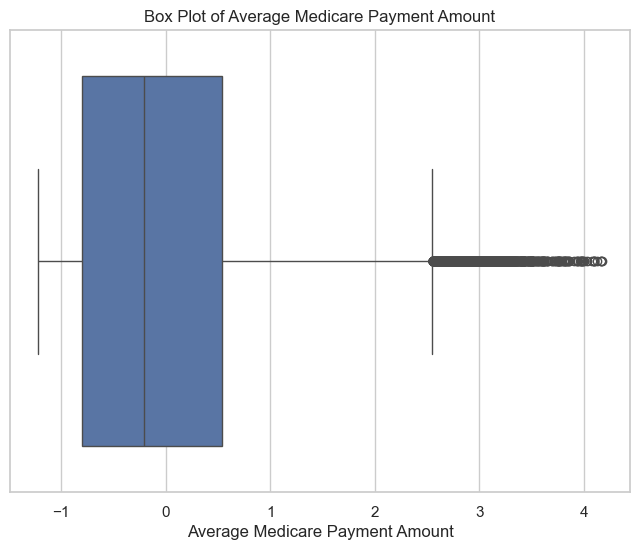

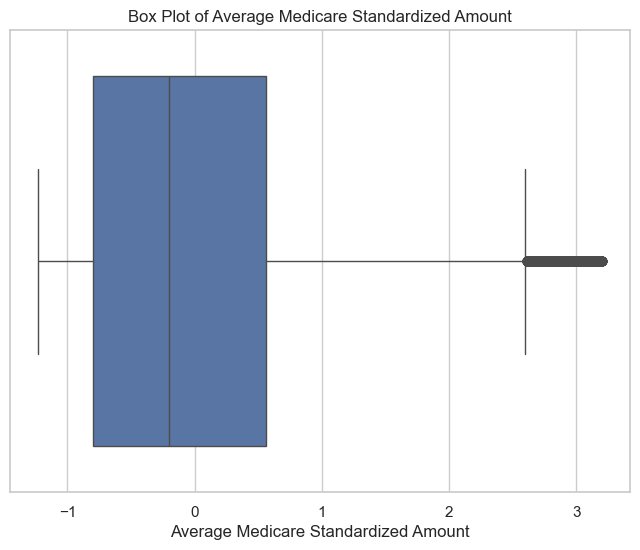

In [266]:
for col in numeric_columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Box Plot of {col}')
  plt.xlabel(col)
  plt.show()

In [176]:
def iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in numeric_columns:
    df = iqr(df, col)

In [177]:
def iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) |  (df[column] > upper_bound)]
    total_values = len(df[column])
    percentage = (len(outliers) / total_values) * 100

    return len(outliers),percentage

outlier_summary={}
for col in numeric_columns:
    outlier,percentage = iqr(df, col)
    outlier_summary[col] = percentage
    print(f"{col}:-Number of Outliers: {outlier},Percentage of Outliers: {percentage:.2f}%")
    print()

Number of Services:-Number of Outliers: 1195,Percentage of Outliers: 2.02%

Number of Medicare Beneficiaries:-Number of Outliers: 2896,Percentage of Outliers: 4.89%

Number of Distinct Medicare Beneficiary/Per Day Services:-Number of Outliers: 1669,Percentage of Outliers: 2.82%

Average Medicare Allowed Amount:-Number of Outliers: 160,Percentage of Outliers: 0.27%

Average Submitted Charge Amount:-Number of Outliers: 1921,Percentage of Outliers: 3.25%

Average Medicare Payment Amount:-Number of Outliers: 315,Percentage of Outliers: 0.53%

Average Medicare Standardized Amount:-Number of Outliers: 216,Percentage of Outliers: 0.36%



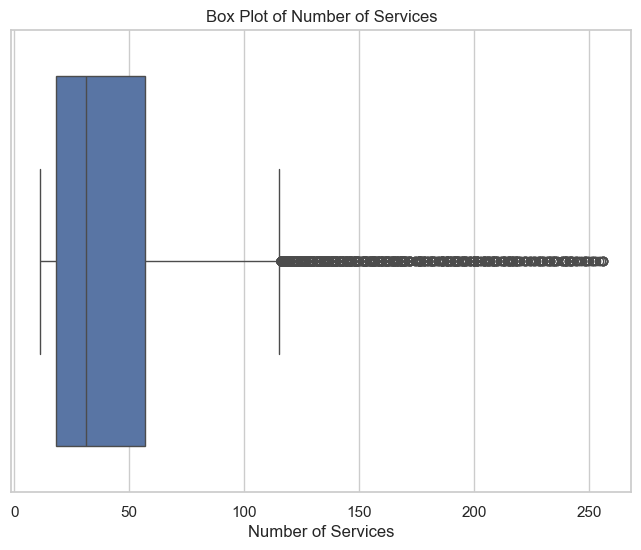

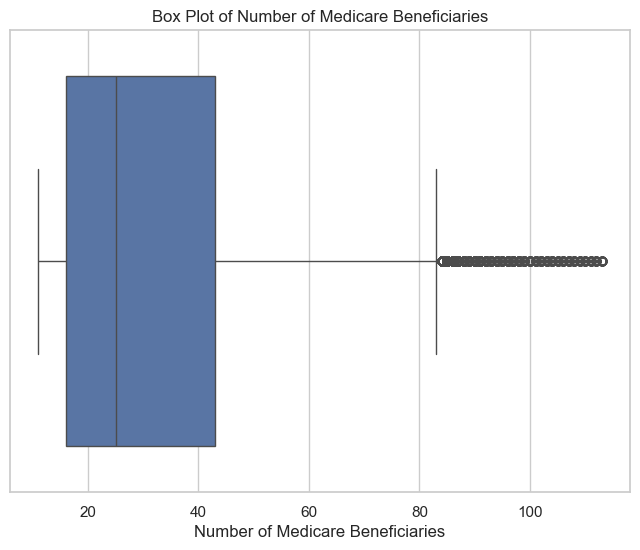

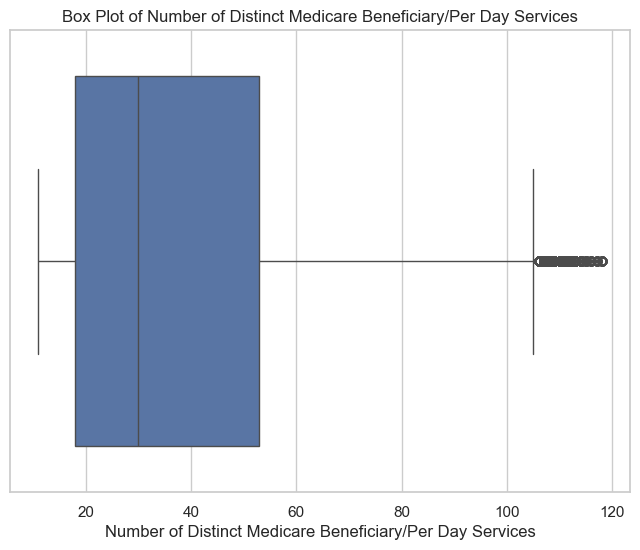

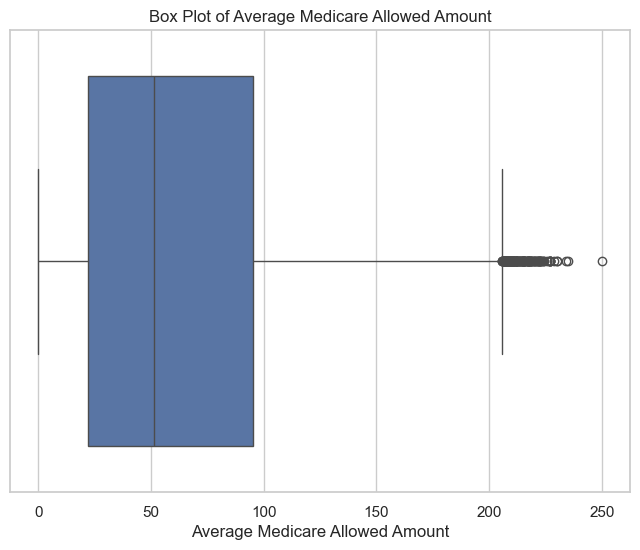

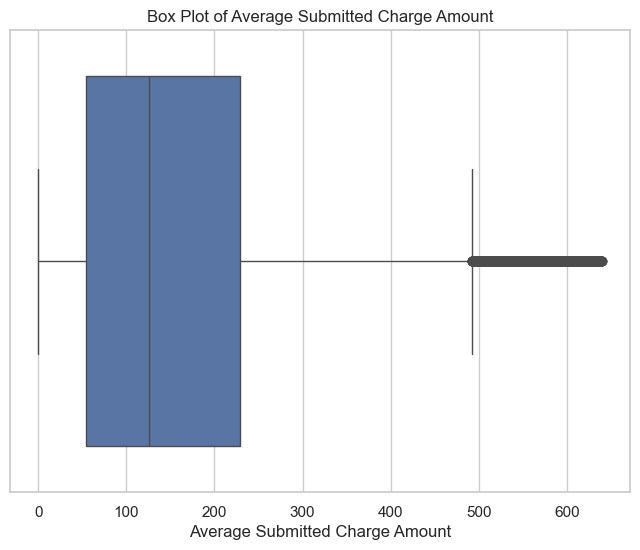

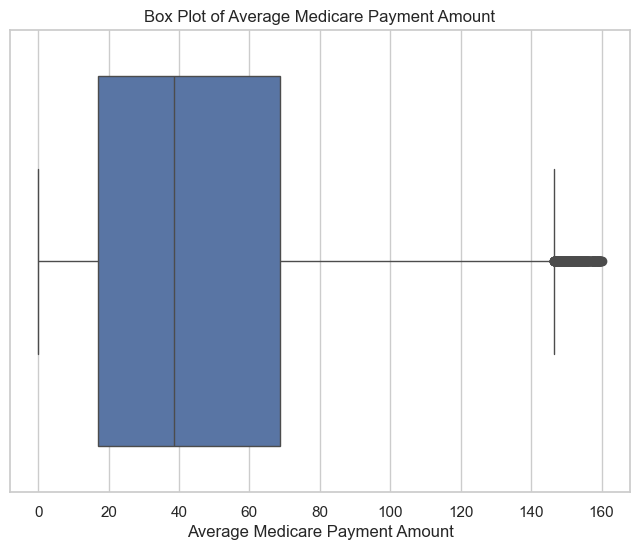

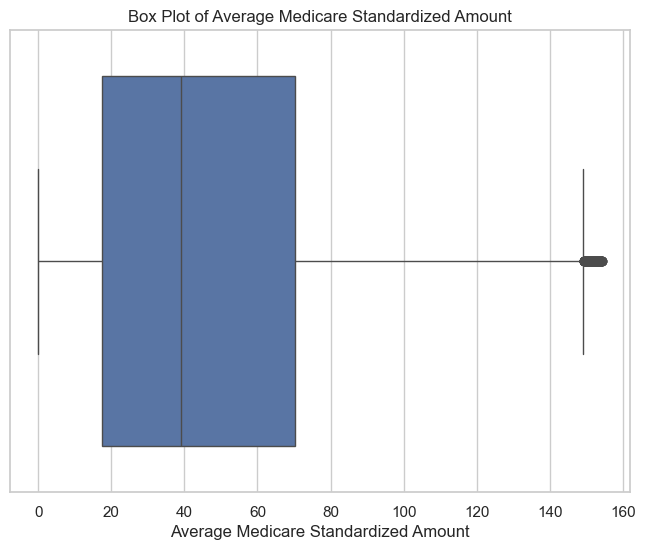

In [178]:

for col in numeric_columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Box Plot of {col}')
  plt.xlabel(col)
  plt.show()


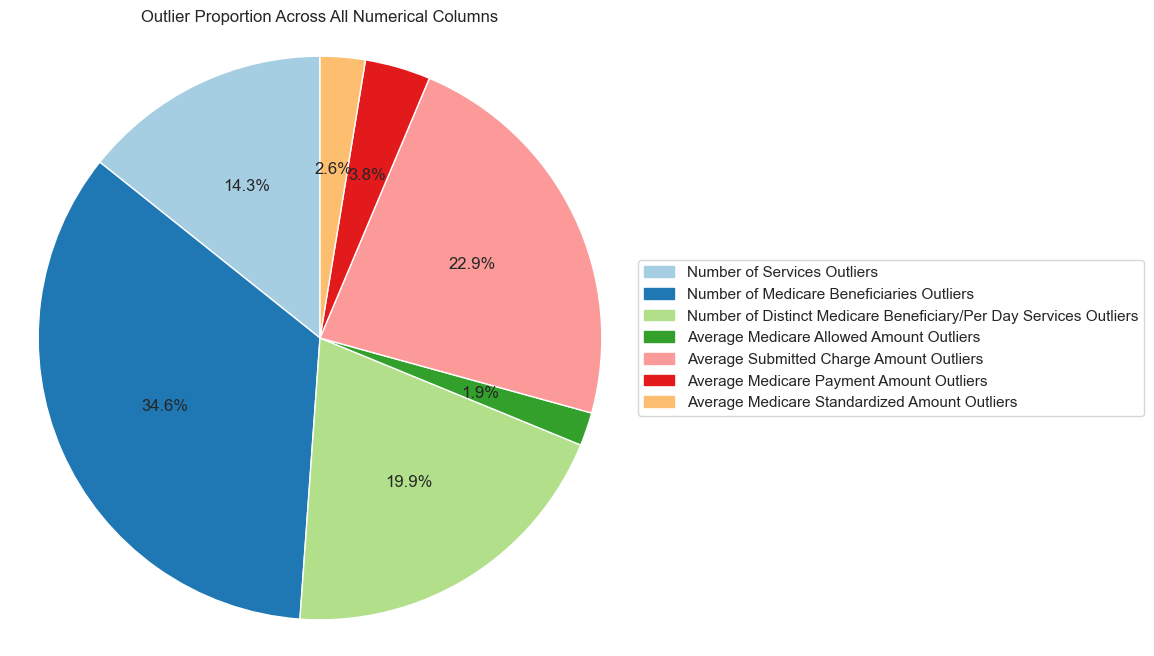

In [179]:
import matplotlib.patches as mpatches
labels = [f'{col} Outliers' for col in outlier_summary.keys()]
sizes = [percentage for percentage in outlier_summary.values()]
colors = plt.cm.Paired(range(len(outlier_summary)))

plt.figure(figsize=(8, 8))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Outlier Proportion Across All Numerical Columns')
plt.axis('equal')

legend_patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
plt.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [180]:
import numpy as np
def z_score(df, column, threshold):
    mean = df[column].mean()
    std = df[column].std()
    df['z_score'] = (df[column] - mean) / std
    return df[np.abs(df['z_score']) <= threshold].drop(columns=['z_score'])

for col in numeric_columns:
    df = z_score(df, col,3)

In [181]:
def z_score(df, column, threshold):
    mean = df[column].mean()
    std = df[column].std()
    df['z_score'] = (df[column] - mean) / std

    outliers = df[(df['z_score'] > threshold) | (df['z_score'] < -threshold)]
    total_values = len(df[column])
    percentage = (len(outliers) / total_values) * 100
    df = df.drop(columns=['z_score'])
    return len(outliers), percentage

outlier_summary = {}
for col in numeric_columns:
    outlier, percentage = z_score(df, col,3)
    outlier_summary[col] = percentage
    print(f"{col}:- Number of Outliers: {outlier}, Percentage of Outliers: {percentage:.2f}%")
    print()


Number of Services:- Number of Outliers: 254, Percentage of Outliers: 0.45%

Number of Medicare Beneficiaries:- Number of Outliers: 636, Percentage of Outliers: 1.13%

Number of Distinct Medicare Beneficiary/Per Day Services:- Number of Outliers: 145, Percentage of Outliers: 0.26%

Average Medicare Allowed Amount:- Number of Outliers: 55, Percentage of Outliers: 0.10%

Average Submitted Charge Amount:- Number of Outliers: 465, Percentage of Outliers: 0.83%

Average Medicare Payment Amount:- Number of Outliers: 36, Percentage of Outliers: 0.06%

Average Medicare Standardized Amount:- Number of Outliers: 11, Percentage of Outliers: 0.02%



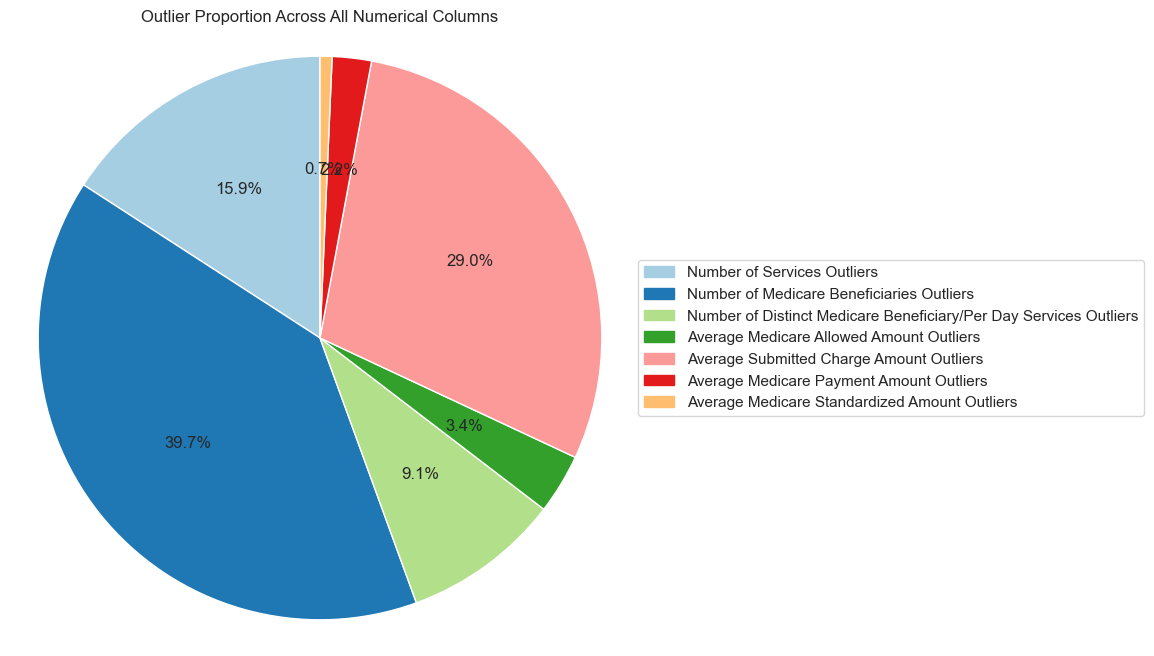

In [182]:
import matplotlib.patches as mpatches
labels = [f'{col} Outliers' for col in outlier_summary.keys()]
sizes = [percentage for percentage in outlier_summary.values()]
colors = plt.cm.Paired(range(len(outlier_summary)))

plt.figure(figsize=(8, 8))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Outlier Proportion Across All Numerical Columns')
plt.axis('equal')

legend_patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
plt.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [183]:
categorical_col=[
    'Credentials of the Provider',
    'Gender of the Provider',
    'Entity Type of the Provider',
    'City of the Provider',
    'State Code of the Provider',
    'Country Code of the Provider',
    'Provider Type',
    'Medicare Participation Indicator',
    'Place of Service',
    'HCPCS Code',
    'HCPCS Drug Indicator'
]

In [184]:
for col in categorical_col:
    unique_count = df[col].nunique()
    print(f"Number of unique values in '{col}': {unique_count}")

Number of unique values in 'Credentials of the Provider': 1318
Number of unique values in 'Gender of the Provider': 2
Number of unique values in 'Entity Type of the Provider': 1
Number of unique values in 'City of the Provider': 4805
Number of unique values in 'State Code of the Provider': 57
Number of unique values in 'Country Code of the Provider': 4
Number of unique values in 'Provider Type': 80
Number of unique values in 'Medicare Participation Indicator': 2
Number of unique values in 'Place of Service': 2
Number of unique values in 'HCPCS Code': 1580
Number of unique values in 'HCPCS Drug Indicator': 2


In [185]:
#Binary Encoding
import category_encoders as ce
binary_col=[
    'Gender of the Provider',
    'Medicare Participation Indicator',
    'Place of Service',
    'HCPCS Drug Indicator'
]

binary_encoder = ce.BinaryEncoder(cols=binary_col)
binary_encoded = binary_encoder.fit_transform(df)
binary_encoded = binary_encoded[binary_encoded.columns.difference(df.columns)]
binary_encoded.head()

Gender of the Provider_0  Gender of the Provider_1  HCPCS Drug Indicator_0  \
2                         0                         1                       0   
3                         0                         1                       0   
4                         0                         1                       0   
6                         0                         1                       0   
7                         0                         1                       0   

   HCPCS Drug Indicator_1  Medicare Participation Indicator_0  \
2                       1                                   0   
3                       1                                   0   
4                       1                                   0   
6                       1                                   0   
7                       1                                   0   

   Medicare Participation Indicator_1  Place of Service_0  Place of Service_1  
2                                   1                   0                   1  
3                                   1                   0                   1  
4                                   1                   0                   1  
6                                   1                   1                   0  
7                                   1                   0                   1

Text(0, 0.5, 'Frequency')

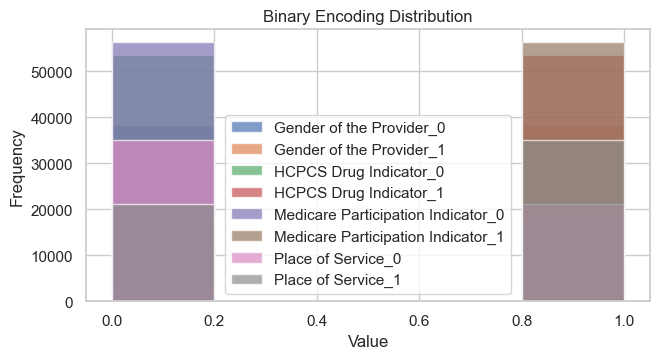

In [186]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 2, 1)
binary_encoded.plot(kind='hist', alpha=0.7, bins=5, ax=plt.gca())
plt.title('Binary Encoding Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [187]:
#one-Hot Encoding
import numpy as np
oneHot_col = [
    'Country Code of the Provider',
    'State Code of the Provider'
]
encoded_df = pd.get_dummies(df[oneHot_col], drop_first=True)
encoded_df = encoded_df.astype(int).to_numpy()
oneHot_encoded = pd.DataFrame(encoded_df, columns=pd.get_dummies(df[oneHot_col], drop_first=True).columns)
oneHot_encoded.head()

Country Code of the Provider_JP  Country Code of the Provider_TR  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Country Code of the Provider_US  State Code of the Provider_AK  \
0                                1                              0   
1                                1                              0   
2                                1                              0   
3                                1                              0   
4                                1                              0   

   State Code of the Provider_AL  State Code of the Provider_AP  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   State Code of the Provider_AR  State Code of the Provider_AZ  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   State Code of the Provider_CA  State Code of the Provider_CO  ...  \
0                              0                              0  ...   
1                              0                              0  ...   
2                              0                              0  ...   
3                              0                              0  ...   
4                              1                              0  ...   

   State Code of the Provider_TX  State Code of the Provider_UT  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   State Code of the Provider_VA  State Code of the Provider_VI  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   State Code of the Provider_VT  State Code of the Provider_WA  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   State Code of the Provider_WI  State Code of the Provider_WV  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   State Code of the Provider_WY  State Code of the Provider_ZZ  
0                              0                              0  
1                              0                              0  
2                              0                              0  
3                              0              

Text(0, 0.5, 'Frequency')

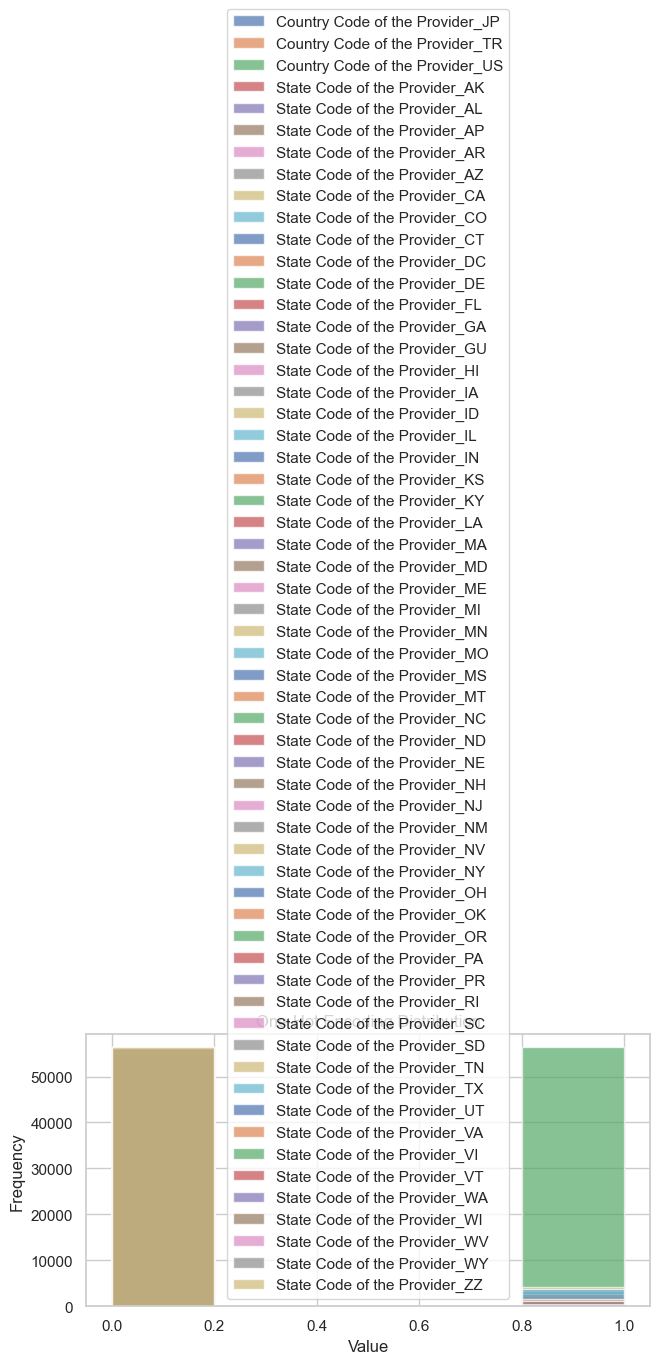

In [188]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 2, 2)
oneHot_encoded.plot(kind='hist', alpha=0.7, bins=5, ax=plt.gca())
plt.title('One-Hot Encoding Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [189]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encode_columns = [
    'Credentials of the Provider',
    'Provider Type'
    ]
label_encoded_data = {}
le = LabelEncoder()
for col in label_encode_columns:
    df[col] = df[col].fillna('Unknown')
    label_encoded_data[col] = le.fit_transform(df[col])

label_encoded = pd.DataFrame(label_encoded_data)
label_encoded.head()

Credentials of the Provider  Provider Type
0                          323             64
1                          684             34
2                          300             34
3                          300             18
4                          485             21

Text(0, 0.5, 'Frequency')

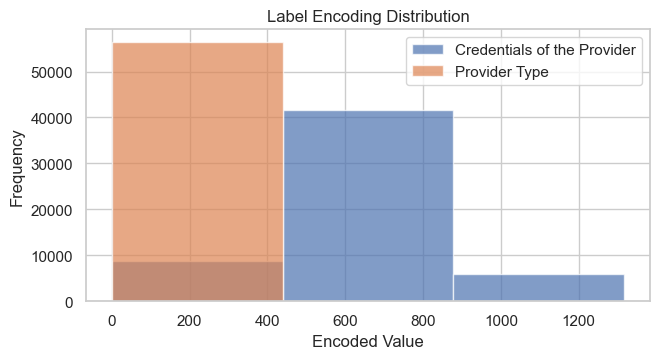

In [190]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 2, 3)
label_encoded.plot(kind='hist', alpha=0.7, bins=3, ax=plt.gca())
plt.title('Label Encoding Distribution')
plt.xlabel('Encoded Value')
plt.ylabel('Frequency')

In [191]:
#Frequency Encoding
freq_col=[
    'City of the Provider',
    'HCPCS Code'
]

freq_encoded = pd.DataFrame()
for col in freq_col:
    frequency_encoded = df[col].value_counts().to_dict()
    freq_encoded[col + '_Encoded'] = df[col].map(frequency_encoded)

freq_encoded.head()

City of the Provider_Encoded  HCPCS Code_Encoded
2                             7                  32
3                           199                 379
4                            27                 505
6                            54                 360
7                            22                 804

Text(0, 0.5, 'Frequency')

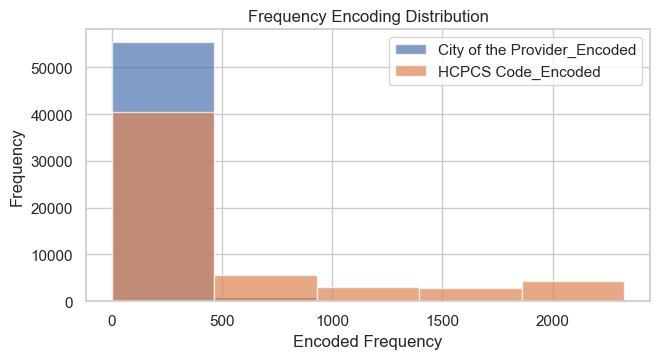

In [192]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 2, 4)
freq_encoded.plot(kind='hist', alpha=0.7, bins=5, ax=plt.gca())
plt.title('Frequency Encoding Distribution')
plt.xlabel('Encoded Frequency')
plt.ylabel('Frequency')

In [193]:
# Standardizing the numeric columns
from sklearn.preprocessing import StandardScaler
numeric_col = df[['Number of Services', 'Number of Medicare Beneficiaries',
                      'Number of Distinct Medicare Beneficiary/Per Day Services',
                      'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
                      'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']]

scaler = StandardScaler()
scaled_numerical = pd.DataFrame(scaler.fit_transform(numeric_col), columns=numeric_col.columns)
scaled_numerical = scaled_numerical.round(2)
scaled_numerical.head()

Number of Services  Number of Medicare Beneficiaries  \
0               -0.27                             -0.89   
1               -0.72                             -0.65   
2               -0.23                             -0.36   
3               -0.68                             -0.60   
4                0.49                              0.89   

   Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                              -0.22          
1                                              -0.70          
2                                              -0.26          
3                                              -0.66          
4                                               0.58          

   Average Medicare Allowed Amount  Average Submitted Charge Amount  \
0                             0.65                             0.01   
1                            -1.23                            -1.22   
2                            -0.74                            -0.93   
3                            -0.32                             0.08   
4                            -0.68                            -0.85   

   Average Medicare Payment Amount  Average Medicare Standardized Amount  
0                             0.57                                  0.43  
1                            -1.22                                 -1.22  
2                            -0.75                                 -0.77  
3                            -0.26                                 -0.23  
4                            -0.48                                 -0.59

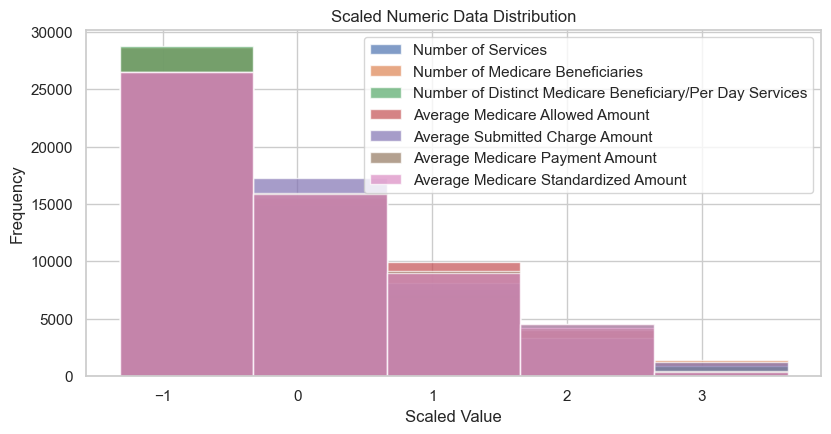

In [194]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 2, 5)
scaled_numerical.plot(kind='hist', alpha=0.7, bins=5, ax=plt.gca())
plt.title('Scaled Numeric Data Distribution')
plt.xlabel('Scaled Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [195]:
binary_encoded.reset_index(drop=True, inplace=True)
oneHot_encoded.reset_index(drop=True, inplace=True)
label_encoded.reset_index(drop=True, inplace=True)
freq_encoded.reset_index(drop=True, inplace=True)
scaled_numerical.reset_index(drop=True, inplace=True)

In [196]:
final = pd.concat([scaled_numerical,binary_encoded,oneHot_encoded, label_encoded,freq_encoded], axis=1)
final.head()
new_df=final
new_df.to_csv("new_df.csv", index=False)
final.head()

Number of Services  Number of Medicare Beneficiaries  \
0               -0.27                             -0.89   
1               -0.72                             -0.65   
2               -0.23                             -0.36   
3               -0.68                             -0.60   
4                0.49                              0.89   

   Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                              -0.22          
1                                              -0.70          
2                                              -0.26          
3                                              -0.66          
4                                               0.58          

   Average Medicare Allowed Amount  Average Submitted Charge Amount  \
0                             0.65                             0.01   
1                            -1.23                            -1.22   
2                            -0.74                            -0.93   
3                            -0.32                             0.08   
4                            -0.68                            -0.85   

   Average Medicare Payment Amount  Average Medicare Standardized Amount  \
0                             0.57                                  0.43   
1                            -1.22                                 -1.22   
2                            -0.75                                 -0.77   
3                            -0.26                                 -0.23   
4                            -0.48                                 -0.59   

   Gender of the Provider_0  Gender of the Provider_1  HCPCS Drug Indicator_0  \
0                         0                         1                       0   
1                         0                         1                       0   
2                         0                         1                       0   
3                         0                         1                       0   
4                         0                         1                       0   

   ...  State Code of the Provider_VT  State Code of the Provider_WA  \
0  ...                              0                              0   
1  ...                              0                              0   
2  ...                              0                              0   
3  ...                              0                              0   
4  ...                              0                              0   

   State Code of the Provider_WI  State Code of the Provider_WV  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   State Code of the Provider_WY  State Code of the Provider_ZZ  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   Credentials of the Provider  Provider Type  City of the Provider_Encoded  \
0                          323             64                             7   
1                          684             34                           199   
2                          300             34                            27   
3                          300             18                            54   
4                          485             21                            22   

   HCPCS Code_Encoded  
0                  32  
1                 379  
2                 505  
3                 360  
4                 804  

[5 rows x 78 columns]

In [ ]:
#Isolation Forest
from sklearn.ensemble import IsolationForest
IF = IsolationForest(n_estimators=10, contamination=0.20)
final['anomaly_iforest'] = IF.fit_predict(final)

anomalies_if = final[final['anomaly_iforest'] == -1]
normal_if = final[final['anomaly_iforest'] == 1]
anomalies_if.shape[0]-

11228

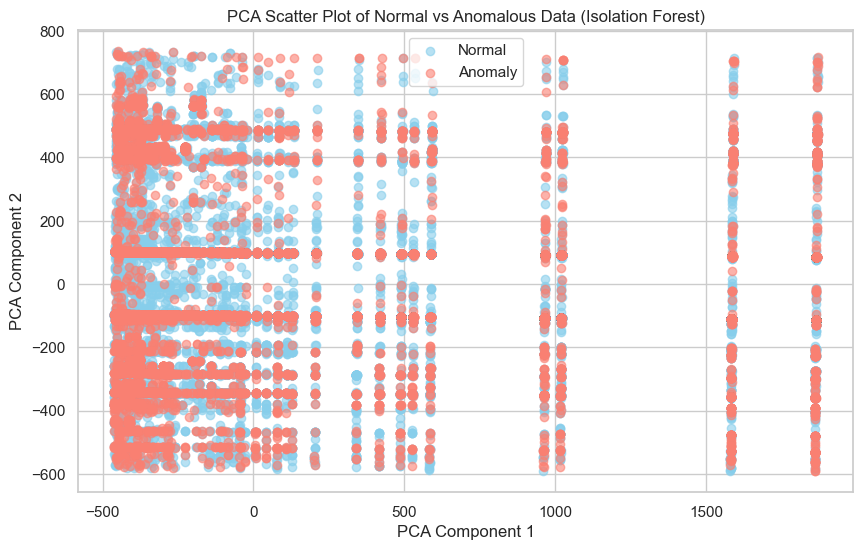

In [198]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce data to 2 dimensions, excluding 'anomaly_iforest' column
pca = PCA(n_components=2)
final_pca = pca.fit_transform(final.drop(['anomaly_iforest'], axis=1))

# Add PCA components to DataFrame for plotting
final['pca1'] = final_pca[:, 0]
final['pca2'] = final_pca[:, 1]

# Plotting
plt.figure(figsize=(10, 6))

# Plot normal points
plt.scatter(final[final['anomaly_iforest'] == 1]['pca1'], 
            final[final['anomaly_iforest'] == 1]['pca2'], 
            color='skyblue', label='Normal', alpha=0.6)

# Plot anomaly points
plt.scatter(final[final['anomaly_iforest'] == -1]['pca1'], 
            final[final['anomaly_iforest'] == -1]['pca2'], 
            color='salmon', label='Anomaly', alpha=0.6)

# Labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Scatter Plot of Normal vs Anomalous Data (Isolation Forest)')
plt.legend()
plt.show()


In [199]:
#Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.10)
final['lof_anomaly'] = lof.fit_predict(final)
anomalies_lof = final[final['lof_anomaly'] == -1]
normal_lof = final[final['lof_anomaly'] == 1]
 
anomalies_lof.shape[0]

5634

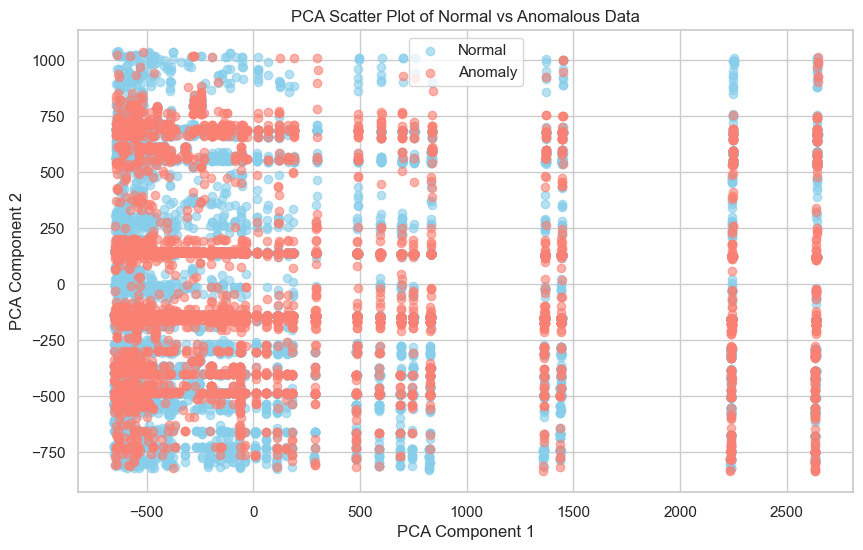

In [200]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
final_pca = pca.fit_transform(final.drop(['lof_anomaly'], axis=1))

# Add PCA components to DataFrame for plotting
final['pca1'] = final_pca[:, 0]
final['pca2'] = final_pca[:, 1]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(final[final['lof_anomaly'] == 1]['pca1'], final[final['lof_anomaly'] == 1]['pca2'], 
            color='skyblue', label='Normal', alpha=0.6)
plt.scatter(final[final['lof_anomaly'] == -1]['pca1'], final[final['lof_anomaly'] == -1]['pca2'], 
            color='salmon', label='Anomaly', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Scatter Plot of Normal vs Anomalous Data')
plt.legend()
plt.show()

In [201]:
#One-Class SVM
from sklearn.svm import OneClassSVM 
oc_svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)
final['svm_anomaly'] = oc_svm.fit_predict(final)
anomalies_svm = final[final['svm_anomaly'] == -1]
print(f"One-Class SVM detected {len(anomalies_svm)} anomalies.")

One-Class SVM detected 5924 anomalies.


c:\Users\sikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


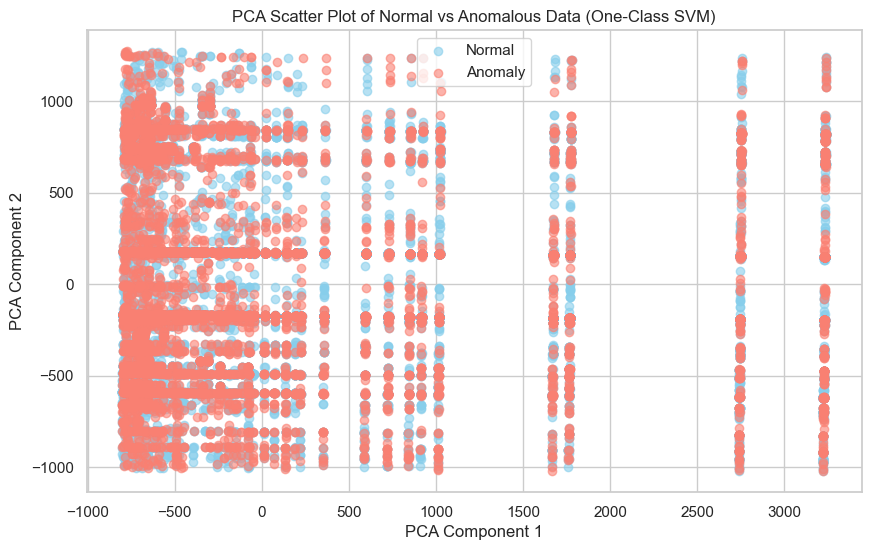

In [202]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce data to 2 dimensions, excluding 'svm_anomaly' column
pca = PCA(n_components=2)
final_pca = pca.fit_transform(final.drop(['svm_anomaly'], axis=1))

# Add PCA components to DataFrame for plotting
final['pca1'] = final_pca[:, 0]
final['pca2'] = final_pca[:, 1]

# Plotting
plt.figure(figsize=(10, 6))

# Plot normal points
plt.scatter(final[final['svm_anomaly'] == 1]['pca1'], 
            final[final['svm_anomaly'] == 1]['pca2'], 
            color='skyblue', label='Normal', alpha=0.6)

# Plot anomaly points
plt.scatter(final[final['svm_anomaly'] == -1]['pca1'], 
            final[final['svm_anomaly'] == -1]['pca2'], 
            color='salmon', label='Anomaly', alpha=0.6)

# Labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Scatter Plot of Normal vs Anomalous Data (One-Class SVM)')
plt.legend()
plt.show()


In [203]:
#Elliptic Envelope
from sklearn.covariance import EllipticEnvelope
elliptic_env = EllipticEnvelope(contamination=0.05, random_state=42)
final['ellipse_anomaly'] = elliptic_env.fit_predict(final)
anomalies_ellipse = final[final['ellipse_anomaly'] == -1]
print(f"Elliptic Envelope detected {len(anomalies_ellipse)} anomalies.")

c:\Users\sikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\covariance\_robust_covariance.py:748: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


Elliptic Envelope detected 2817 anomalies.


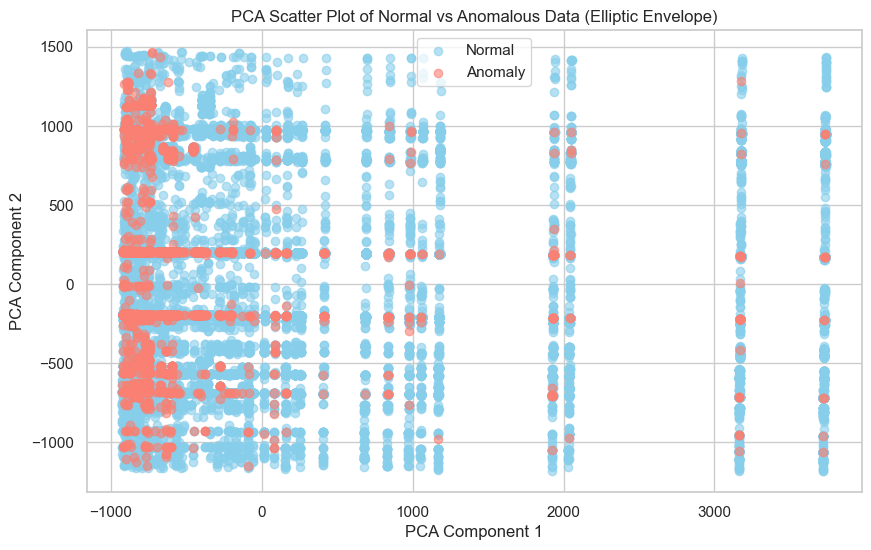

In [204]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce data to 2 dimensions, excluding 'ellipse_anomaly'
pca = PCA(n_components=2)
final_pca = pca.fit_transform(final.drop(['ellipse_anomaly'], axis=1))

# Add PCA components to DataFrame for plotting
final['pca1'] = final_pca[:, 0]
final['pca2'] = final_pca[:, 1]

# Plotting
plt.figure(figsize=(10, 6))

# Plot normal points
plt.scatter(final[final['ellipse_anomaly'] == 1]['pca1'], 
            final[final['ellipse_anomaly'] == 1]['pca2'], 
            color='skyblue', label='Normal', alpha=0.6)

# Plot anomaly points
plt.scatter(final[final['ellipse_anomaly'] == -1]['pca1'], 
            final[final['ellipse_anomaly'] == -1]['pca2'], 
            color='salmon', label='Anomaly', alpha=0.6)

# Labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Scatter Plot of Normal vs Anomalous Data (Elliptic Envelope)')
plt.legend()
plt.show()


In [205]:
#KNN
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=10)
knn.fit(final)
distances, indices = knn.kneighbors(final)
mean_distances = distances.mean(axis=1)
threshold = np.percentile(mean_distances, 90)  
final['knn_anomaly'] = [1 if dist > threshold else -1 for dist in mean_distances]
anomalies_knn = final[final['knn_anomaly'] == 1]
print(f"KNN detected {len(anomalies_knn)} anomalies.")

KNN detected 5634 anomalies.


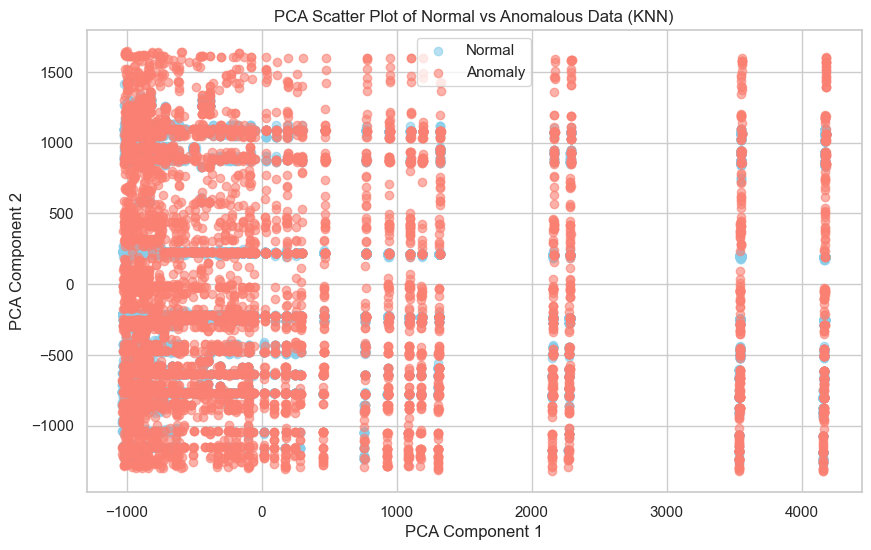

In [206]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce data to 2 dimensions, excluding 'knn_anomaly'
pca = PCA(n_components=2)
final_pca = pca.fit_transform(final.drop(['knn_anomaly'], axis=1))

# Add PCA components to DataFrame for plotting
final['pca1'] = final_pca[:, 0]
final['pca2'] = final_pca[:, 1]

# Plotting
plt.figure(figsize=(10, 6))

# Plot normal points
plt.scatter(final[final['knn_anomaly'] == -1]['pca1'], 
            final[final['knn_anomaly'] == -1]['pca2'], 
            color='skyblue', label='Normal', alpha=0.6)

# Plot anomaly points
plt.scatter(final[final['knn_anomaly'] == 1]['pca1'], 
            final[final['knn_anomaly'] == 1]['pca2'], 
            color='salmon', label='Anomaly', alpha=0.6)

# Labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Scatter Plot of Normal vs Anomalous Data (KNN)')
plt.legend()
plt.show()


In [213]:
#PCA
from sklearn.decomposition import PCA
final_array = final.values
pca = PCA(n_components=2)
pca.fit(final_array)
pca_transformed = pca.inverse_transform(pca.transform(final_array))
reconstruction_error = np.mean((final_array - pca_transformed) ** 2, axis=1)
threshold = np.percentile(reconstruction_error, 85)  
final['pca_anomaly'] = [1 if e > threshold else -1 for e in reconstruction_error]
anomalies_pca = final[final['pca_anomaly'] == 1]
print(f"PCA detected {len(anomalies_pca)} anomalies.")



PCA detected 8450 anomalies.


c:\Users\sikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


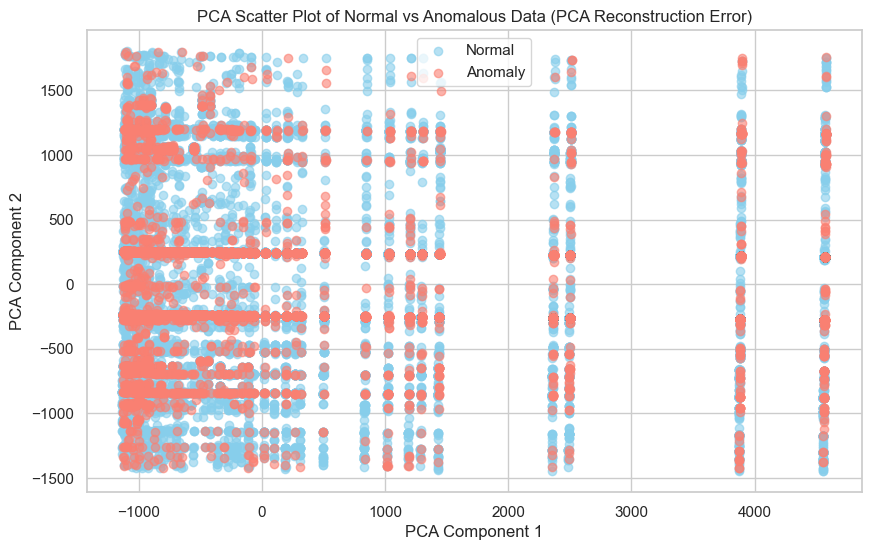

In [208]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
final_pca = pca.fit_transform(final.drop(['pca_anomaly'], axis=1))

# Add PCA components to DataFrame for plotting
final['pca1'] = final_pca[:, 0]
final['pca2'] = final_pca[:, 1]

# Plotting
plt.figure(figsize=(10, 6))

# Plot normal points
plt.scatter(final[final['pca_anomaly'] == -1]['pca1'], 
            final[final['pca_anomaly'] == -1]['pca2'], 
            color='skyblue', label='Normal', alpha=0.6)

# Plot anomaly points
plt.scatter(final[final['pca_anomaly'] == 1]['pca1'], 
            final[final['pca_anomaly'] == 1]['pca2'], 
            color='salmon', label='Anomaly', alpha=0.6)

# Labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Scatter Plot of Normal vs Anomalous Data (PCA Reconstruction Error)')
plt.legend()
plt.show()


In [209]:
# Dictionary to store anomaly counts and overlaps for each model
results = {
    "Isolation Forest": {"anomalies": len(anomalies_if)},
    "Local Outlier Factor": {"anomalies": len(anomalies_lof)},
    "One-Class SVM": {"anomalies": len(anomalies_svm)},
    "Elliptic Envelope": {"anomalies": len(anomalies_ellipse)},
    "KNN": {"anomalies": len(anomalies_knn)},
    "PCA": {"anomalies": len(anomalies_pca)}
}

In [210]:
# Store anomaly labels in a dictionary for easier analysis
anomaly_labels = {
    "Isolation Forest": final['anomaly_iforest'],
    "Local Outlier Factor": final['lof_anomaly'],
    "One-Class SVM": final['svm_anomaly'],
    "Elliptic Envelope": final['ellipse_anomaly'],
    "KNN": final['knn_anomaly'],
    "PCA": final['pca_anomaly']
}

In [211]:
anomaly_df = pd.DataFrame(anomaly_labels)

In [214]:
# Calculate the intersection (overlap) of anomalies between each pair of models
from itertools import combinations
for (model1, labels1), (model2, labels2) in combinations(anomaly_labels.items(), 2):
    overlap_count = np.sum((anomaly_df[model1] == -1) & (anomaly_df[model2] == -1))
    results[f"{model1} vs {model2}"] = {"overlap": overlap_count}

# Calculate the average reconstruction error for PCA
pca_reconstruction_error = np.mean((final - pca_transformed) ** 2, axis=1)
results["PCA"]["average_reconstruction_error"] = pca_reconstruction_error.mean()

print("Comparison Results:")
for model, metrics in results.items():
    print(f"{model}: {metrics}")

Comparison Results:
Isolation Forest: {'anomalies': 11228}
Local Outlier Factor: {'anomalies': 5634}
One-Class SVM: {'anomalies': 5924}
Elliptic Envelope: {'anomalies': 2817}
KNN: {'anomalies': 5634}
PCA: {'anomalies': 8450, 'average_reconstruction_error': 166.28045263567213}
Isolation Forest vs Local Outlier Factor: {'overlap': 1338}
Isolation Forest vs One-Class SVM: {'overlap': 1577}
Isolation Forest vs Elliptic Envelope: {'overlap': 1143}
Isolation Forest vs KNN: {'overlap': 9738}
Isolation Forest vs PCA: {'overlap': 9051}
Local Outlier Factor vs One-Class SVM: {'overlap': 1458}
Local Outlier Factor vs Elliptic Envelope: {'overlap': 264}
Local Outlier Factor vs KNN: {'overlap': 4108}
Local Outlier Factor vs PCA: {'overlap': 4550}
One-Class SVM vs Elliptic Envelope: {'overlap': 370}
One-Class SVM vs KNN: {'overlap': 3452}
One-Class SVM vs PCA: {'overlap': 4127}
Elliptic Envelope vs KNN: {'overlap': 2522}
Elliptic Envelope vs PCA: {'overlap': 2403}
KNN vs PCA: {'overlap': 44360}


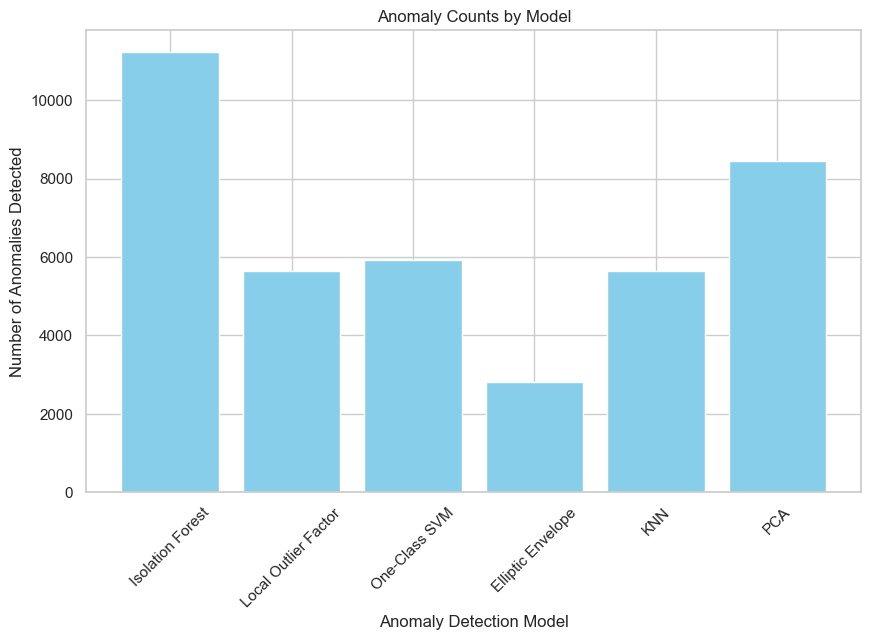

In [215]:
import matplotlib.pyplot as plt
model_names = list(results.keys())
anomaly_counts = [metrics["anomalies"] for metrics in results.values() if "anomalies" in metrics]
plt.figure(figsize=(10, 6))
plt.bar(model_names[:6], anomaly_counts, color="skyblue")
plt.xlabel("Anomaly Detection Model")
plt.ylabel("Number of Anomalies Detected")
plt.title("Anomaly Counts by Model")
plt.xticks(rotation=45)
plt.show()

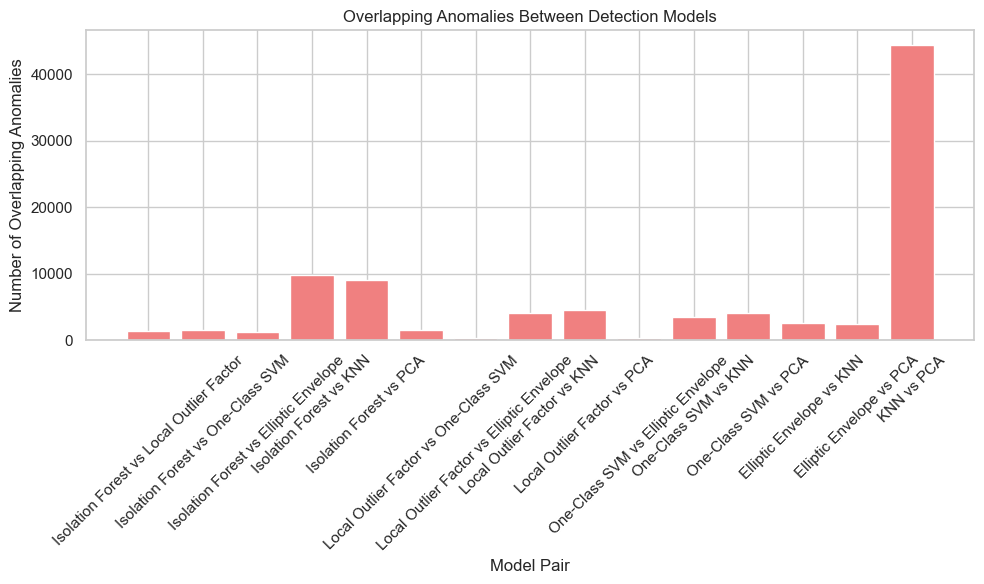

In [216]:
import matplotlib.pyplot as plt
overlap_counts = []
overlap_pairs = []
for key, value in results.items():
    if "vs" in key: 
        overlap_pairs.append(key)
        overlap_counts.append(value["overlap"])

plt.figure(figsize=(10, 6))
plt.bar(overlap_pairs, overlap_counts, color="lightcoral")
plt.xlabel("Model Pair")
plt.ylabel("Number of Overlapping Anomalies")
plt.title("Overlapping Anomalies Between Detection Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

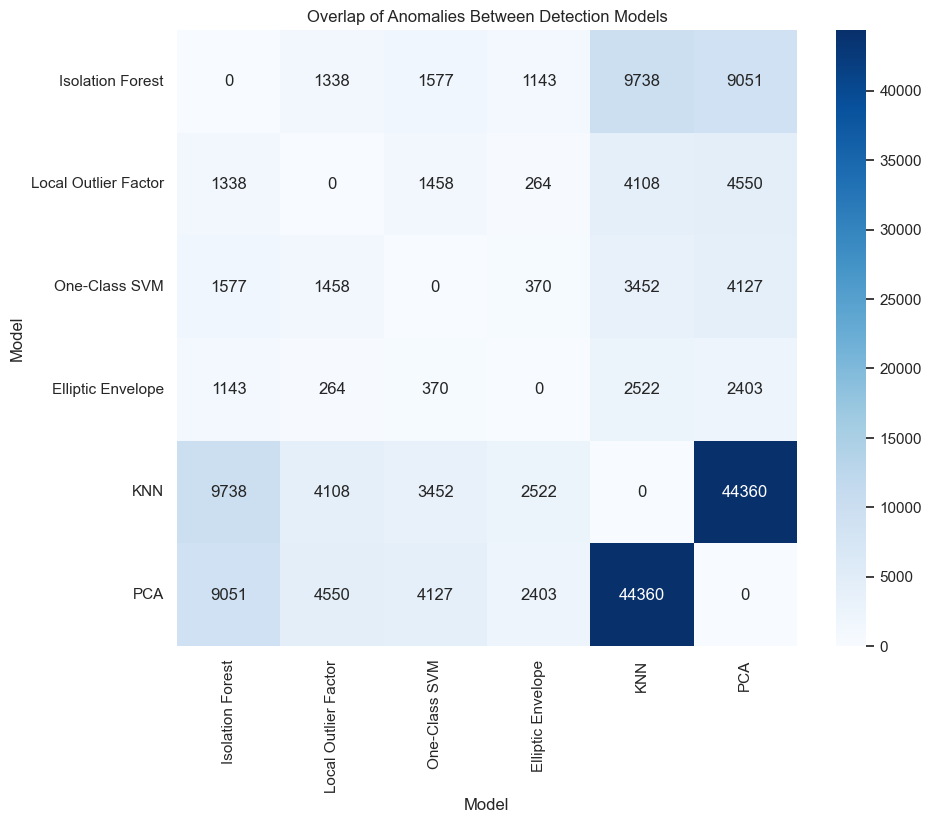

In [217]:
#Heatmap for overlapping part
model_names = list(anomaly_labels.keys())
num_models = len(model_names)
overlap_matrix = np.zeros((num_models, num_models), dtype=int)

for (i, model1), (j, model2) in combinations(enumerate(model_names), 2):
    overlap_count = np.sum((anomaly_df[model1] == -1) & (anomaly_df[model2] == -1))
    overlap_matrix[i, j] = overlap_count
    overlap_matrix[j, i] = overlap_count 

plt.figure(figsize=(10, 8))
sns.heatmap(overlap_matrix, annot=True, fmt="d", xticklabels=model_names, yticklabels=model_names, cmap="Blues")
plt.title("Overlap of Anomalies Between Detection Models")
plt.xlabel("Model")
plt.ylabel("Model")
plt.show()


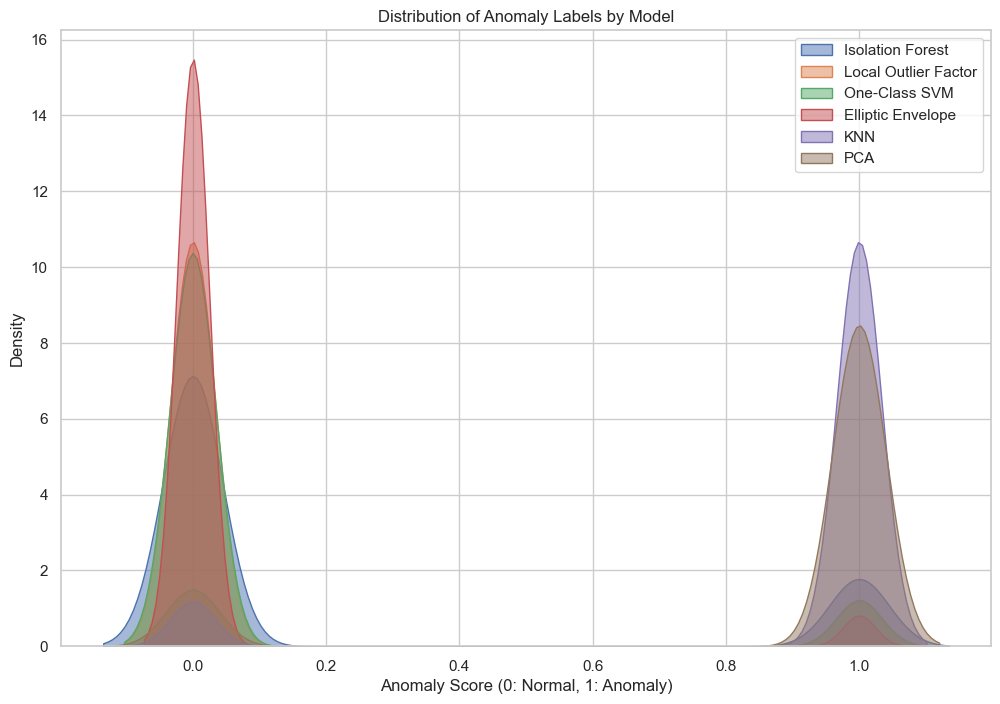

In [218]:
#Density plot
plt.figure(figsize=(12, 8))
for model, predictions in anomaly_labels.items():
    sns.kdeplot(predictions.replace({1: 0, -1: 1}), label=model, fill=True, alpha=0.5)

plt.title("Distribution of Anomaly Labels by Model")
plt.xlabel("Anomaly Score (0: Normal, 1: Anomaly)")
plt.ylabel("Density")
plt.legend()
plt.show()


In [219]:
#silhouette_score
from sklearn.metrics import silhouette_score
silhouette_scores = {}
X = final.values

for model_name, labels in anomaly_labels.items():
    if len(set(labels)) > 1:
        score = silhouette_score(X, labels)
        silhouette_scores[model_name] = score
    else:
        silhouette_scores[model_name] = np.nan 
        
for model, score in silhouette_scores.items():
    print(f'Silhouette Score for {model}: {score}')


Silhouette Score for Isolation Forest: 0.10904938528272345
Silhouette Score for Local Outlier Factor: 0.049146880625610144
Silhouette Score for One-Class SVM: 0.09476289718462824
Silhouette Score for Elliptic Envelope: -0.1930224980620213
Silhouette Score for KNN: 0.14293887838528274
Silhouette Score for PCA: 0.03495222010441124


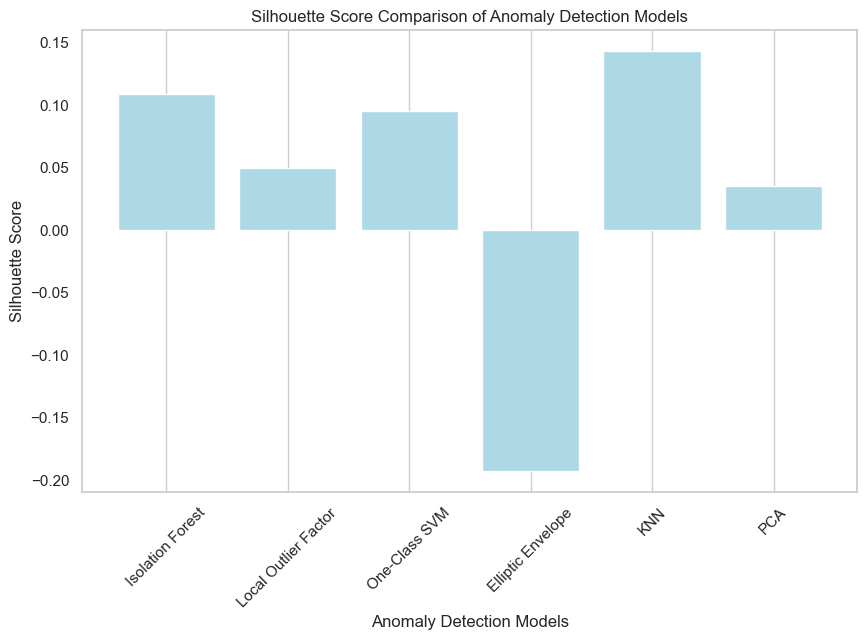

In [220]:
models = list(silhouette_scores.keys())
scores = [score if score is not np.nan else 0 for score in silhouette_scores.values()] 

plt.figure(figsize=(10, 6))
plt.bar(models, scores, color='lightblue')
plt.xlabel('Anomaly Detection Models')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Comparison of Anomaly Detection Models')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [221]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_scores = {}

for model_name, labels in anomaly_labels.items():
    if len(set(labels)) > 1:
        score = calinski_harabasz_score(X, labels)
        calinski_harabasz_scores[model_name] = score
    else:
        calinski_harabasz_scores[model_name] = np.nan 
        
for model, score in calinski_harabasz_scores.items():
    print(f'Calinski-Harabasz Score for {model}: {score}')


Calinski-Harabasz Score for Isolation Forest: 478.38112448648843
Calinski-Harabasz Score for Local Outlier Factor: 84.35693138452268
Calinski-Harabasz Score for One-Class SVM: 111.67361660568689
Calinski-Harabasz Score for Elliptic Envelope: 563.7208367108706
Calinski-Harabasz Score for KNN: 178.36487358025275
Calinski-Harabasz Score for PCA: 189.97199026955005


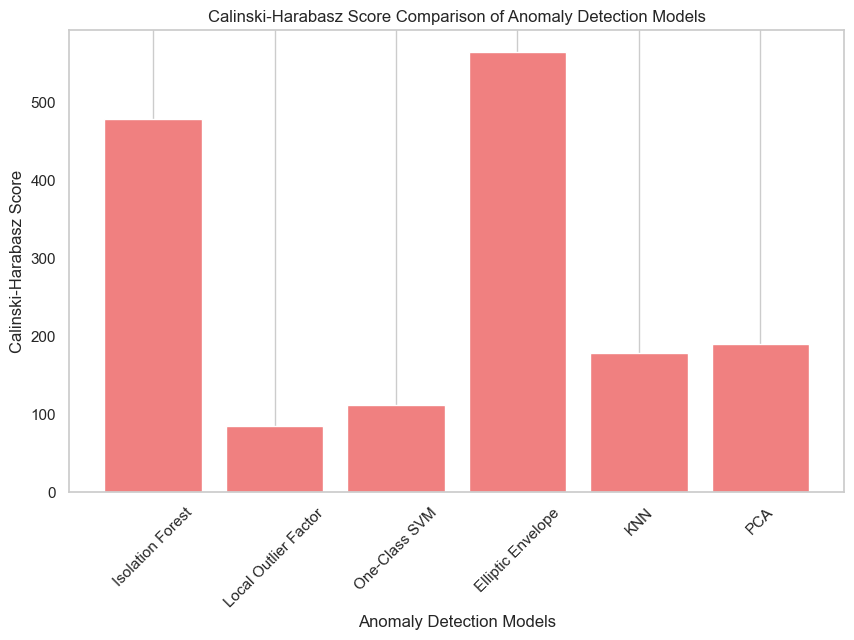

In [222]:
models = list(calinski_harabasz_scores.keys())
scores = [score if score is not np.nan else 0 for score in calinski_harabasz_scores.values()]

plt.figure(figsize=(10, 6))
plt.bar(models, scores, color='lightcoral')
plt.xlabel('Anomaly Detection Models')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score Comparison of Anomaly Detection Models')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [223]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_scores = {}

for model_name, labels in anomaly_labels.items():
    if len(set(labels)) > 1:
        score = davies_bouldin_score(X, labels)
        davies_bouldin_scores[model_name] = score
    else:
        davies_bouldin_scores[model_name] = np.nan 
        
for model, score in davies_bouldin_scores.items():
    print(f'Davies-Bouldin Score for {model}: {score}')

Davies-Bouldin Score for Isolation Forest: 7.497643299728023
Davies-Bouldin Score for Local Outlier Factor: 12.560349937791694
Davies-Bouldin Score for One-Class SVM: 11.497625876749991
Davies-Bouldin Score for Elliptic Envelope: 2.7696903633369
Davies-Bouldin Score for KNN: 9.171802139031543
Davies-Bouldin Score for PCA: 9.835622720771909


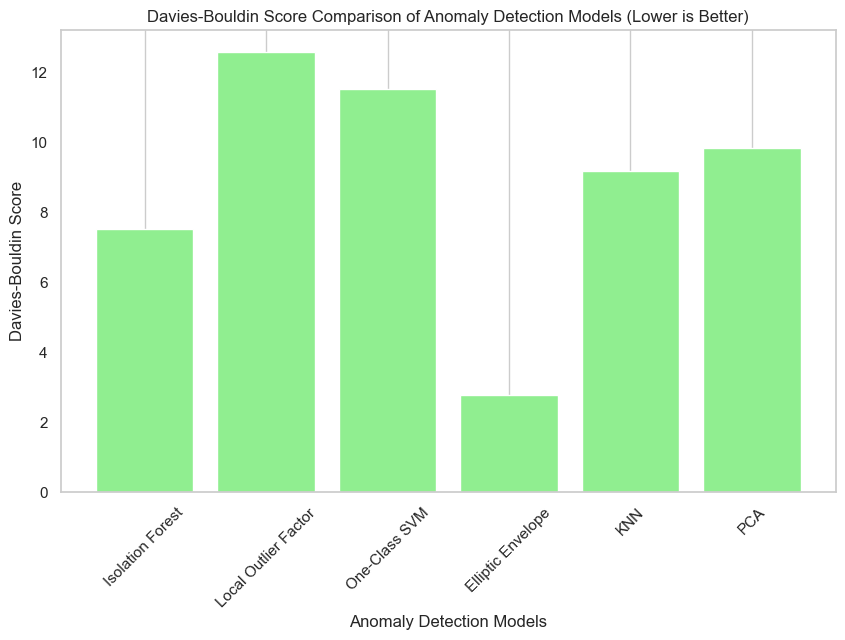

In [224]:
models = list(davies_bouldin_scores.keys())
scores = [score if score is not np.nan else 0 for score in davies_bouldin_scores.values()]

plt.figure(figsize=(10, 6))
plt.bar(models, scores, color='lightgreen')
plt.xlabel('Anomaly Detection Models')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score Comparison of Anomaly Detection Models (Lower is Better)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [225]:
import optuna
# Sample a subset of data for faster computation
final_subset = final.sample(frac=0.3, random_state=42)  # Adjust the fraction as needed

# Objective function for Isolation Forest
def objective_if(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_samples': trial.suggest_float('max_samples', 0.5, 1.0),
        'contamination': trial.suggest_float('contamination', 0.01, 0.2),
        'random_state': 42
    }
    model = IsolationForest(**params)
    model.fit(final_subset)
    predictions = model.predict(final_subset)
    anomaly_score = (predictions == -1).sum() / len(predictions)  # Percentage of anomalies
    return anomaly_score

# Run the Optuna study for Isolation Forest
study_if = optuna.create_study(direction='maximize')
study_if.optimize(objective_if, n_trials=20, timeout=600)
print("Best parameters for Isolation Forest:", study_if.best_params)

[I 2024-11-26 13:37:06,391] A new study created in memory with name: no-name-2bf77872-f14c-44bf-98f8-7f7e3d66c840
[I 2024-11-26 13:37:15,091] Trial 0 finished with value: 0.07497041420118343 and parameters: {'n_estimators': 198, 'max_samples': 0.9394628738185773, 'contamination': 0.07494107130353632}. Best is trial 0 with value: 0.07497041420118343.
[I 2024-11-26 13:37:20,366] Trial 1 finished with value: 0.0993491124260355 and parameters: {'n_estimators': 155, 'max_samples': 0.6262466683923502, 'contamination': 0.09930751259280704}. Best is trial 1 with value: 0.0993491124260355.
[I 2024-11-26 13:37:23,509] Trial 2 finished with value: 0.07952662721893491 and parameters: {'n_estimators': 108, 'max_samples': 0.8847743351935495, 'contamination': 0.07952433516185486}. Best is trial 1 with value: 0.0993491124260355.
[I 2024-11-26 13:37:27,871] Trial 3 finished with value: 0.16727810650887573 and parameters: {'n_estimators': 154, 'max_samples': 0.8540984535313754, 'contamination': 0.167284

Best parameters for Isolation Forest: {'n_estimators': 76, 'max_samples': 0.5850638391506007, 'contamination': 0.1995227855283556}


In [226]:
# Objective function for Local Outlier Factor
def objective_lof(trial):
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors', 5, 50),
        'contamination': trial.suggest_float('contamination', 0.01, 0.2),
        'algorithm': trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
    }
    model = LocalOutlierFactor(**params, novelty=True)
    model.fit(final_subset)
    predictions = model.predict(final_subset)
    anomaly_score = (predictions == -1).sum() / len(predictions)
    return anomaly_score

study_lof = optuna.create_study(direction='maximize')
study_lof.optimize(objective_lof, n_trials=20, timeout=600)
print("Best parameters for Local Outlier Factor:", study_lof.best_params)

[I 2024-11-26 13:38:24,138] A new study created in memory with name: no-name-da89212b-0256-4bd9-96fc-3b397658444e
c:\Users\sikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
[I 2024-11-26 13:38:35,032] Trial 0 finished with value: 0.08396449704142012 and parameters: {'n_neighbors': 10, 'contamination': 0.10559627448550271, 'algorithm': 'auto'}. Best is trial 0 with value: 0.08396449704142012.
c:\Users\sikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
[I 2024-11-26 13:38:43,901] Trial 1 finished with value: 0.05396449704142012 and parameters: {'n_neighbors': 8, 'contamination': 0.07252484750303376, 'algorithm': 'kd_tree'}. Best is trial 0 with value: 0.08396449704142012.
c:\Users\sik

Best parameters for Local Outlier Factor: {'n_neighbors': 33, 'contamination': 0.19771355493965292, 'algorithm': 'ball_tree'}


In [227]:
# Objective function for One class SVM
def objective_svm(trial):
    params = {
        'kernel': trial.suggest_categorical('kernel', ['rbf', 'sigmoid']),
        'gamma': trial.suggest_float('gamma', 1e-4, 1e-1, log=True),
        'nu': trial.suggest_float('nu', 0.01, 0.2)
    }
    model = OneClassSVM(**params)
    model.fit(final_subset)
    predictions = model.predict(final_subset)
    anomaly_score = (predictions == -1).sum() / len(predictions)
    return anomaly_score

study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=20, timeout=600)
print("Best parameters for One-Class SVM:", study_svm.best_params)

[I 2024-11-26 13:42:59,077] A new study created in memory with name: no-name-0857dcf0-eabc-4d42-8af4-1d029d23903d
[I 2024-11-26 13:43:47,957] Trial 0 finished with value: 0.16988165680473372 and parameters: {'kernel': 'sigmoid', 'gamma': 0.016353970563636317, 'nu': 0.16992677491103964}. Best is trial 0 with value: 0.16988165680473372.
[I 2024-11-26 13:47:50,238] Trial 1 finished with value: 0.19633136094674555 and parameters: {'kernel': 'rbf', 'gamma': 0.0009544940017799149, 'nu': 0.020261324714872284}. Best is trial 1 with value: 0.19633136094674555.
[I 2024-11-26 13:48:21,347] Trial 2 finished with value: 0.12017751479289941 and parameters: {'kernel': 'sigmoid', 'gamma': 0.006366800244874231, 'nu': 0.11888489604251389}. Best is trial 1 with value: 0.19633136094674555.
[I 2024-11-26 13:48:43,840] Trial 3 finished with value: 0.1176923076923077 and parameters: {'kernel': 'sigmoid', 'gamma': 0.0012500782381678153, 'nu': 0.1160390909090938}. Best is trial 1 with value: 0.1963313609467455

Best parameters for One-Class SVM: {'kernel': 'rbf', 'gamma': 0.005672018736875186, 'nu': 0.01792174739741828}


In [228]:
# Objective function for Elliptic Envelope
def objective_ellipse(trial):
    params = {
        'contamination': trial.suggest_float('contamination', 0.01, 0.2),
        'support_fraction': trial.suggest_float('support_fraction', 0.5, 1.0)
    }
    model = EllipticEnvelope(**params)
    model.fit(final_subset)
    predictions = model.predict(final_subset)
    anomaly_score = (predictions == -1).sum() / len(predictions)
    return anomaly_score

study_ellipse = optuna.create_study(direction='maximize')
study_ellipse.optimize(objective_ellipse, n_trials=20, timeout=600)
print("Best parameters for Elliptic Envelope:", study_ellipse.best_params)

[I 2024-11-26 13:57:47,562] A new study created in memory with name: no-name-994c4f2b-6fd4-4642-9648-5bfdaa395a4f
c:\Users\sikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\covariance\_robust_covariance.py:748: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
[I 2024-11-26 13:58:13,628] Trial 0 finished with value: 0.13911242603550295 and parameters: {'contamination': 0.1390800807200212, 'support_fraction': 0.6677663391326466}. Best is trial 0 with value: 0.13911242603550295.
c:\Users\sikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\covariance\_robust_covariance.py:748: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
[I 2024-11-26 13:58:37,211] Trial 1 finished with value: 0.18301775147928995 and parameters: {'contamination': 0.18300717204491343, 'support_fraction': 0.7028563493262356}. Best is trial 1 with value: 0.18301775147928995.
c:\Users\sikr

Best parameters for Elliptic Envelope: {'contamination': 0.1996220925144907, 'support_fraction': 0.7708889770636442}


In [229]:
# Objective function for KNN anomaly detection
def objective_knn(trial):
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors', 5, 50),
        'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'chebyshev', 'minkowski'])
    }
    knn = NearestNeighbors(**params)
    knn.fit(final_subset)
    distances, _ = knn.kneighbors(final_subset)
    mean_distances = distances.mean(axis=1)
    threshold = np.percentile(mean_distances, 90)
    predictions = [1 if dist > threshold else -1 for dist in mean_distances]
    anomaly_score = (np.array(predictions) == 1).sum() / len(predictions)
    return anomaly_score

study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=20, timeout=600)
print("Best parameters for KNN:", study_knn.best_params)

[I 2024-11-26 14:05:32,150] A new study created in memory with name: no-name-e598724f-f6fc-43c0-8a76-3943a3fc0d97


[I 2024-11-26 14:06:15,871] Trial 0 finished with value: 0.1 and parameters: {'n_neighbors': 43, 'metric': 'manhattan'}. Best is trial 0 with value: 0.1.
[I 2024-11-26 14:06:21,405] Trial 1 finished with value: 0.1 and parameters: {'n_neighbors': 19, 'metric': 'euclidean'}. Best is trial 0 with value: 0.1.
[I 2024-11-26 14:07:21,393] Trial 2 finished with value: 0.1 and parameters: {'n_neighbors': 9, 'metric': 'chebyshev'}. Best is trial 0 with value: 0.1.
[I 2024-11-26 14:07:25,684] Trial 3 finished with value: 0.1 and parameters: {'n_neighbors': 18, 'metric': 'minkowski'}. Best is trial 0 with value: 0.1.
[I 2024-11-26 14:07:31,371] Trial 4 finished with value: 0.1 and parameters: {'n_neighbors': 50, 'metric': 'minkowski'}. Best is trial 0 with value: 0.1.
[I 2024-11-26 14:08:12,890] Trial 5 finished with value: 0.1 and parameters: {'n_neighbors': 22, 'metric': 'manhattan'}. Best is trial 0 with value: 0.1.
[I 2024-11-26 14:09:13,710] Trial 6 finished with value: 0.1 and parameters: 

Best parameters for KNN: {'n_neighbors': 43, 'metric': 'manhattan'}


In [230]:
# Objective function for PCA anomaly detection
def objective_pca(trial):
    params = {
        'n_components': trial.suggest_int('n_components', 2, min(10, final_subset.shape[1]))
    }
    pca = PCA(**params)
    pca_transformed = pca.inverse_transform(pca.fit_transform(final_subset))
    reconstruction_error = np.mean((final_subset.values - pca_transformed) ** 2, axis=1)
    threshold = np.percentile(reconstruction_error, 85)
    predictions = [1 if e > threshold else -1 for e in reconstruction_error]
    anomaly_score = (np.array(predictions) == 1).sum() / len(predictions)
    return anomaly_score

study_pca = optuna.create_study(direction='maximize')
study_pca.optimize(objective_pca, n_trials=20, timeout=600)
print("Best parameters for PCA:", study_pca.best_params)

[I 2024-11-26 14:12:43,641] A new study created in memory with name: no-name-f55a2ecc-66ab-4910-9879-beb306b4198a


[I 2024-11-26 14:12:43,838] Trial 0 finished with value: 0.15 and parameters: {'n_components': 7}. Best is trial 0 with value: 0.15.
[I 2024-11-26 14:12:43,955] Trial 1 finished with value: 0.15 and parameters: {'n_components': 6}. Best is trial 0 with value: 0.15.
[I 2024-11-26 14:12:44,063] Trial 2 finished with value: 0.15 and parameters: {'n_components': 4}. Best is trial 0 with value: 0.15.
[I 2024-11-26 14:12:44,177] Trial 3 finished with value: 0.15 and parameters: {'n_components': 6}. Best is trial 0 with value: 0.15.
[I 2024-11-26 14:12:44,308] Trial 4 finished with value: 0.15 and parameters: {'n_components': 7}. Best is trial 0 with value: 0.15.
[I 2024-11-26 14:12:44,425] Trial 5 finished with value: 0.15 and parameters: {'n_components': 9}. Best is trial 0 with value: 0.15.
[I 2024-11-26 14:12:44,542] Trial 6 finished with value: 0.15 and parameters: {'n_components': 4}. Best is trial 0 with value: 0.15.
[I 2024-11-26 14:12:44,660] Trial 7 finished with value: 0.15 and par

Best parameters for PCA: {'n_components': 7}


In [231]:
# Isolation Forest with tuned parameters
tuned_params_if = study_if.best_params

isolation_forest_tuned = IsolationForest(
    n_estimators=tuned_params_if['n_estimators'],
    max_samples=tuned_params_if['max_samples'],
    contamination=tuned_params_if['contamination'],
    random_state=42 
)
final['anomaly_iforest'] = isolation_forest_tuned.fit_predict(final)


In [232]:
# Local Outlier Factor with tuned parameters
tuned_params_lof = study_lof.best_params

lof_tuned = LocalOutlierFactor(
    n_neighbors=tuned_params_lof['n_neighbors'],
    contamination=tuned_params_lof['contamination'],
    algorithm=tuned_params_lof['algorithm']
)
final['lof_anomaly'] = lof_tuned.fit_predict(final)



In [233]:
# Elliptic Envelope with tuned parameters
tuned_params_elliptic = study_ellipse.best_params

elliptic_env_tuned = EllipticEnvelope(
    contamination=tuned_params_elliptic['contamination'],
    support_fraction=tuned_params_elliptic['support_fraction'],
    random_state=42
)
final['ellipse_anomaly'] = elliptic_env_tuned.fit_predict(final)


c:\Users\sikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\covariance\_robust_covariance.py:748: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


In [234]:
#KNN with tuned parameters
tuned_params_knn = study_knn.best_params  

knn_tuned = NearestNeighbors(
    n_neighbors=tuned_params_knn['n_neighbors'],  
    metric=tuned_params_knn['metric']           
)

knn_tuned.fit(final)
distances, indices = knn_tuned.kneighbors(final)
mean_distances = distances.mean(axis=1)
threshold = np.percentile(mean_distances, 90) 
final['knn_anomaly'] = [1 if dist > threshold else -1 for dist in mean_distances]


In [235]:
#PCA with tuned parameters
tuned_params_pca = study_pca.best_params
pca_tuned = PCA(n_components=tuned_params_pca['n_components'])
pca_transformed = pca_tuned.inverse_transform(pca_tuned.fit_transform(final_subset))
reconstruction_error = np.mean((final_subset.values - pca_transformed) ** 2, axis=1)
threshold = np.percentile(reconstruction_error, 85)
final['pca_anomaly'] = -1  
final.loc[final_subset.index, 'pca_anomaly'] = [1 if e > threshold else -1 for e in reconstruction_error]

In [236]:
# One-Class SVM with tuned parameters
tuned_params_ocsvm = study_svm.best_params

one_class_svm_tuned = OneClassSVM(
    kernel=tuned_params_ocsvm['kernel'],
    nu=tuned_params_ocsvm['nu'],
    gamma=tuned_params_ocsvm['gamma']
)
final['svm_anomaly'] = one_class_svm_tuned.fit_predict(final)

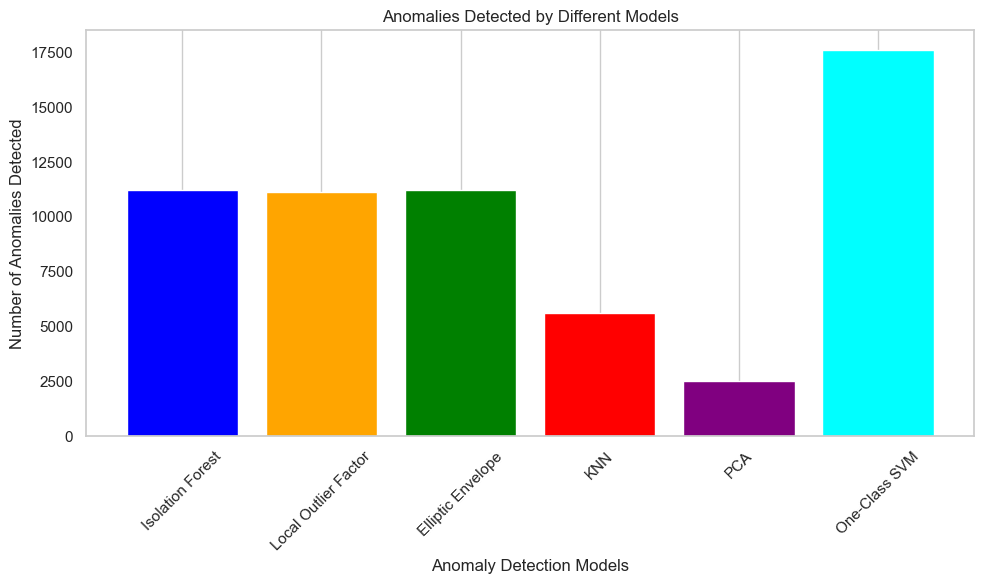

In [237]:

num_anomalies_iforest = np.sum(final['anomaly_iforest'] == -1)
num_anomalies_lof = np.sum(final['lof_anomaly'] == -1)
num_anomalies_ellipse = np.sum(final['ellipse_anomaly'] == -1)
num_anomalies_knn = np.sum(final['knn_anomaly'] == 1) 
num_anomalies_pca = np.sum(final['pca_anomaly'] == 1) 
num_anomalies_svm = np.sum(final['svm_anomaly'] == -1)

models = ['Isolation Forest', 'Local Outlier Factor', 'Elliptic Envelope', 'KNN', 'PCA', 'One-Class SVM']
num_anomalies = [
    num_anomalies_iforest,
    num_anomalies_lof,
    num_anomalies_ellipse,
    num_anomalies_knn,
    num_anomalies_pca,
    num_anomalies_svm
]

#Barplot
plt.figure(figsize=(10, 6))
plt.bar(models, num_anomalies, color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'])
plt.xlabel('Anomaly Detection Models')
plt.ylabel('Number of Anomalies Detected')
plt.title('Anomalies Detected by Different Models')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


In [238]:
final.shape

(56333, 86)

In [239]:
#Importing Librarty
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import numpy as np

X = final.values

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

#Build the Autoencoder Model
def create_autoencoder(input_shape):
    input_layer = layers.Input(shape=input_shape)
    encoder = layers.Dense(64, activation='relu')(input_layer)
    encoder = layers.Dense(32, activation='relu')(encoder)
    decoder = layers.Dense(64, activation='relu')(encoder)
    decoder = layers.Dense(input_shape[0], activation='sigmoid')(decoder)
    autoencoder = models.Model(input_layer, decoder)
    return autoencoder

# Define the input shape
input_shape = (X_train.shape[1],)
autoencoder = create_autoencoder(input_shape)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

#Train the Model
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.1)

# Get the reconstructed output
X_reconstructed = autoencoder.predict(X_test)

# Calculate the reconstruction error
reconstruction_error = np.mean((X_test - X_reconstructed) ** 2, axis=1)

# Define a threshold for anomalies
threshold = np.percentile(reconstruction_error, 95)  

# Identify anomalies
anomalies = reconstruction_error > threshold

# Create an anomaly label array (1 for anomaly, -1 for normal)
anomaly_labels = np.full(X.shape[0], -1)

# Get indices of anomalies in X_test
anomaly_indices = np.where(anomalies)[0]  

# Set corresponding indices in anomaly_labels array to 1 (for anomalies)
X_test_indices = X_train.shape[0] + anomaly_indices 
anomaly_labels[X_test_indices] = 1
print(f"Detected {anomalies.sum()} anomalies using the Autoencoder.")


Epoch 1/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 42552.7500 - val_loss: 43372.1758
Epoch 2/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 42363.7188 - val_loss: 43372.1797
Epoch 3/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 42047.4336 - val_loss: 43372.1797
Epoch 4/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 42340.7227 - val_loss: 43372.1797
Epoch 5/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 42446.1562 - val_loss: 43372.1680
Epoch 6/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 42474.8477 - val_loss: 43372.1680
Epoch 7/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 42190.6172 - val_loss: 43372.1719
Epoch 8/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 42101.6211 - val_loss: 43372.1680
Epoch 9/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 42281.9844 - val_loss: 43372.1641
Epoch 10/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 41820.8633 - val_loss: 43372.1797
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/ste

In [240]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
import numpy as np

# For example, let's assume 10% of the test data are anomalies
true_anomalies = np.random.choice([0, 1], size=X_test.shape[0], p=[0.9, 0.1])  

# Fix the shape mismatch: Squeeze the last dimension of X_reconstructed
X_reconstructed = X_reconstructed.squeeze()  

# Now, X_test and X_reconstructed should have the same shape
assert X_test.shape == X_reconstructed.shape, f"Shape mismatch: {X_test.shape} vs {X_reconstructed.shape}"

# Calculate the reconstruction error
reconstruction_error = np.mean((X_test - X_reconstructed) ** 2, axis=1)

# Define the threshold and detect anomalies
threshold = np.percentile(reconstruction_error, 95)  
anomalies = reconstruction_error > threshold

# Ensure anomalies and true_anomalies have the same length
assert len(true_anomalies) == len(anomalies), "The lengths of true_anomalies and anomalies do not match!"

# Compute precision, recall, accuracy, F1-score, and confusion matrix
precision = precision_score(true_anomalies, anomalies)
recall = recall_score(true_anomalies, anomalies)
accuracy = accuracy_score(true_anomalies, anomalies)
f1 = f1_score(true_anomalies, anomalies)
conf_matrix = confusion_matrix(true_anomalies, anomalies)

# Print the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")


Precision: 0.0904
Recall: 0.0449
Accuracy: 0.8582
F1-Score: 0.0600
Confusion Matrix:
[[9618  513]
 [1085   51]]


In [241]:
# Select numeric columns from final DataFrame
numeric = final[['Number of Services', 'Number of Medicare Beneficiaries',
                 'Number of Distinct Medicare Beneficiary/Per Day Services',
                 'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
                 'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']]

# Prepare the dataset
X = numeric.values
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Build the Autoencoder Model
def create_autoencoder(input_shape):
    input_layer = layers.Input(shape=input_shape)
    encoder = layers.Dense(64, activation='relu')(input_layer)
    encoder = layers.Dense(32, activation='relu')(encoder)
    decoder = layers.Dense(64, activation='relu')(encoder)
    decoder = layers.Dense(input_shape[0], activation='sigmoid')(decoder)
    autoencoder = models.Model(input_layer, decoder)
    return autoencoder

# Define the input shape
input_shape = (X_train.shape[1],)
autoencoder = create_autoencoder(input_shape)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.1)

# Get the reconstructed output
X_reconstructed = autoencoder.predict(X_test)

# Calculate the reconstruction error
reconstruction_error = np.mean((X_test - X_reconstructed) ** 2, axis=1)

# Define a threshold for anomalies
threshold = np.percentile(reconstruction_error, 95)

# Identify anomalies
anomalies = reconstruction_error > threshold

# Create an anomaly label array (1 for anomaly, -1 for normal)
anomaly_labels = np.full(X.shape[0], -1)

# Get indices of anomalies in X_test
anomaly_indices = np.where(anomalies)[0]

# Set corresponding indices in anomaly_labels array to 1 (for anomalies)
X_test_indices = X_train.shape[0] + anomaly_indices
anomaly_labels[X_test_indices] = 1

# Ground truth labels (for evaluation, assuming -1 as normal and 1 as anomalies)s
y_true = np.full(X_test.shape[0], -1)  
y_true[anomaly_indices] = 1  
y_pred = anomaly_labels[X_train.shape[0]:]

# Evaluate model performance
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label=1)
recall = recall_score(y_true, y_pred, pos_label=1)
f1 = f1_score(y_true, y_pred, pos_label=1)
conf_matrix = confusion_matrix(y_true, y_pred)

print(f"Detected {anomalies.sum()} anomalies using the Autoencoder.")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Epoch 1/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6105 - val_loss: 0.5042
Epoch 2/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5014 - val_loss: 0.5029
Epoch 3/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4995 - val_loss: 0.5027
Epoch 4/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4995 - val_loss: 0.5022
Epoch 5/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4994 - val_loss: 0.5019
Epoch 6/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4970 - val_loss: 0.5020
Epoch 7/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4999 - val_loss: 0.5018
Epoch 8/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4972 - val_loss: 0.5017
Epoch 9/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5014 - val_loss: 0.5016
Epoch 10/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5013 - val_loss: 0.5016
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Detected 564 anomalies using the Autoencoder.
Accuracy: 1.0000
Precision: 1.00

353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


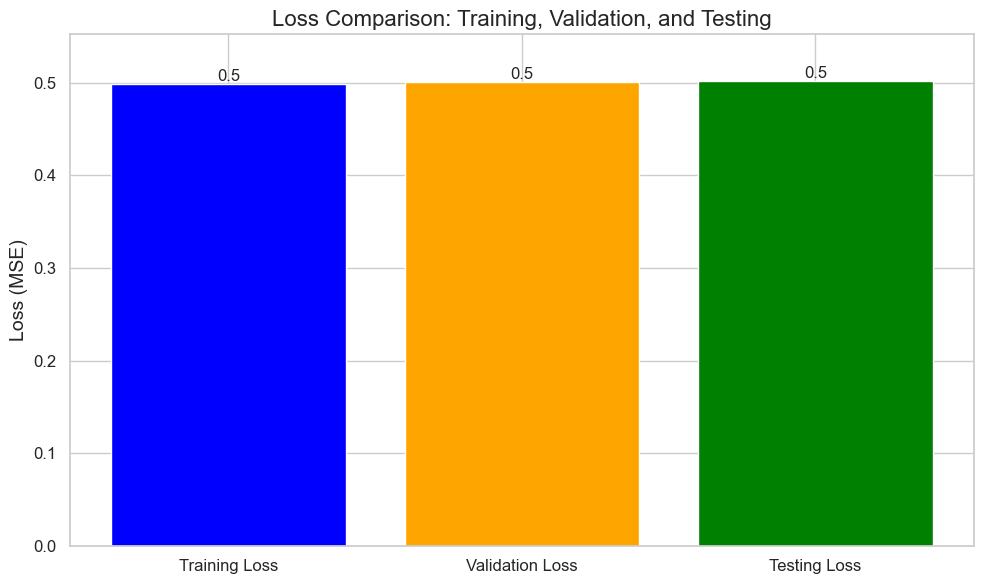

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Set the style using seaborn
sns.set(style='whitegrid')

# Train the model and store the training history without printing epochs
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.1, verbose=0)

# Calculate testing loss
X_reconstructed_test = autoencoder.predict(X_test)
testing_loss = mean_squared_error(X_test, X_reconstructed_test)

# Get the last training and validation loss
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

# Prepare data for bar plot
loss_names = ['Training Loss', 'Validation Loss', 'Testing Loss']
loss_values = [train_loss, val_loss, testing_loss]

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(loss_names, loss_values, color=['blue', 'orange', 'green'])

# Adding the loss values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Add titles and labels
plt.title('Loss Comparison: Training, Validation, and Testing', fontsize=16)
plt.ylabel('Loss (MSE)', fontsize=14)
plt.ylim(0, max(loss_values) + 0.1 * max(loss_values))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [243]:
final.shape

(56333, 86)

In [244]:
from tensorflow.keras import layers, models
import numpy as np

# Define a 1D CNN Autoencoder model for debugging
def CNN_autoencoder_1d(input_shape):
    input_layer = layers.Input(shape=input_shape)

    # Encoder: Basic structure with no pooling or strides
    x = layers.Conv1D(32, 3, activation='relu', padding='same')(input_layer)
    print("Encoder Conv1D-1 output shape:", x.shape)
    
    x = layers.Conv1D(16, 3, activation='relu', padding='same')(x)
    print("Encoder Conv1D-2 output shape:", x.shape)
    
    encoded = layers.Conv1D(8, 3, activation='relu', padding='same')(x)
    print("Encoded output shape:", encoded.shape)

    # Decoder: Exact reverse structure
    x = layers.Conv1D(16, 3, activation='relu', padding='same')(encoded)
    print("Decoder Conv1D-1 output shape:", x.shape)
    
    x = layers.Conv1D(32, 3, activation='relu', padding='same')(x)
    print("Decoder Conv1D-2 output shape:", x.shape)
    
    decoded = layers.Conv1D(1, 3, activation='sigmoid', padding='same')(x)
    print("Decoded output shape:", decoded.shape)

    # Autoencoder model
    autoencoder = models.Model(input_layer, decoded)
    return autoencoder

# Reshape data for Conv1D (samples, timesteps, channels)
X_train_reshaped = np.expand_dims(X_train, axis=2)
X_test_reshaped = np.expand_dims(X_test, axis=2)

# Compile and train the CNN Autoencoder
input_shape = X_train_reshaped.shape[1:]
cnn_autoencoder_1d = CNN_autoencoder_1d(input_shape)
cnn_autoencoder_1d.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
cnn_autoencoder_1d.fit(X_train_reshaped, X_train_reshaped, epochs=15, batch_size=32, validation_split=0.1)

# Calculate reconstruction error for anomaly detection
X_reconstructed = cnn_autoencoder_1d.predict(X_test_reshaped)
reconstruction_error = np.mean((X_test_reshaped - X_reconstructed) ** 2, axis=(1, 2))
threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold

print(f"Detected {anomalies.sum()} anomalies using 1D CNN Autoencoder.")


Encoder Conv1D-1 output shape: (None, 7, 32)
Encoder Conv1D-2 output shape: (None, 7, 16)
Encoded output shape: (None, 7, 8)
Decoder Conv1D-1 output shape: (None, 7, 16)
Decoder Conv1D-2 output shape: (None, 7, 32)
Decoded output shape: (None, 7, 1)
Epoch 1/15
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.5953 - val_loss: 0.5024
Epoch 2/15
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.4988 - val_loss: 0.5015
Epoch 3/15
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.4985 - val_loss: 0.5015
Epoch 4/15
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.5015 - val_loss: 0.5012
Epoch 5/15
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.4988 - val_loss: 0.5013
Epoch 6/15
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.4992 - val_loss: 0.5012
Epoch 7/15
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.4997 - val_loss: 0.5012
Epoch 8/15
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.4996 - val_loss: 0.5017
Epoch 9/15
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 6s 5

Epoch 1/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.5882 - val_loss: 0.5020
Epoch 2/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.4967 - val_loss: 0.5014
Epoch 3/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.4976 - val_loss: 0.5013
Epoch 4/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.5012 - val_loss: 0.5015
Epoch 5/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.4967 - val_loss: 0.5012
Epoch 6/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.5022 - val_loss: 0.5013
Epoch 7/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.4990 - val_loss: 0.5011
Epoch 8/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.4954 - val_loss: 0.5011
Epoch 9/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.5003 - val_loss: 0.5011
Epoch 10/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.4965 - val_loss: 0.5011


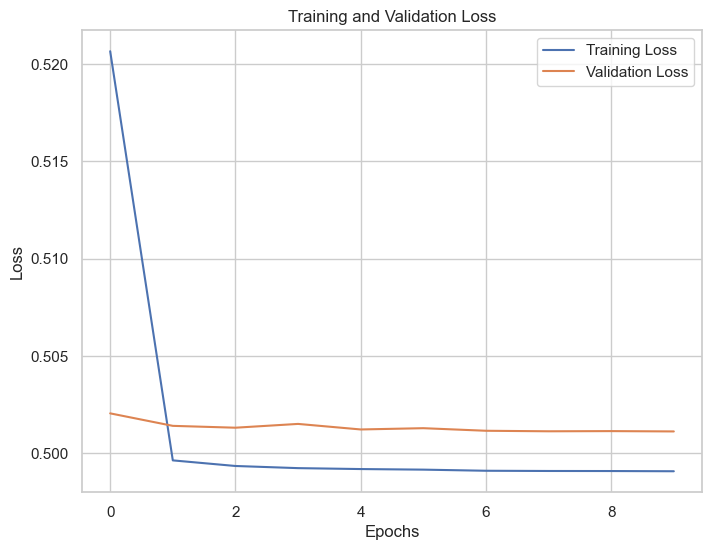

353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


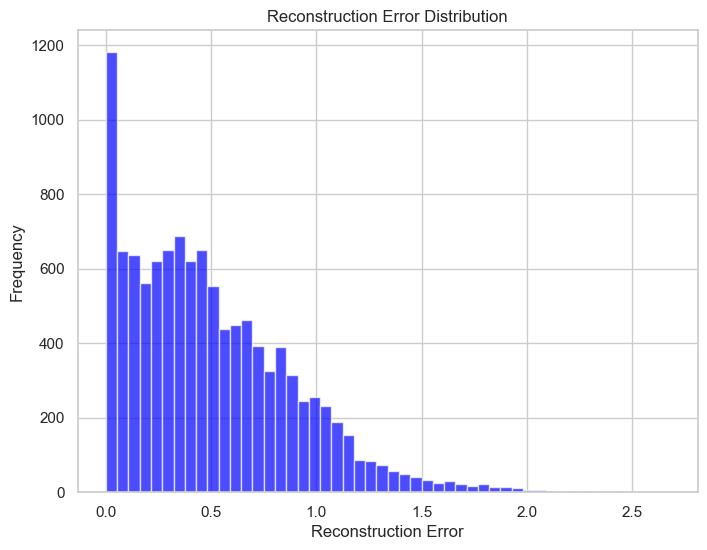

Anomaly detection threshold: 1.2056422581303474


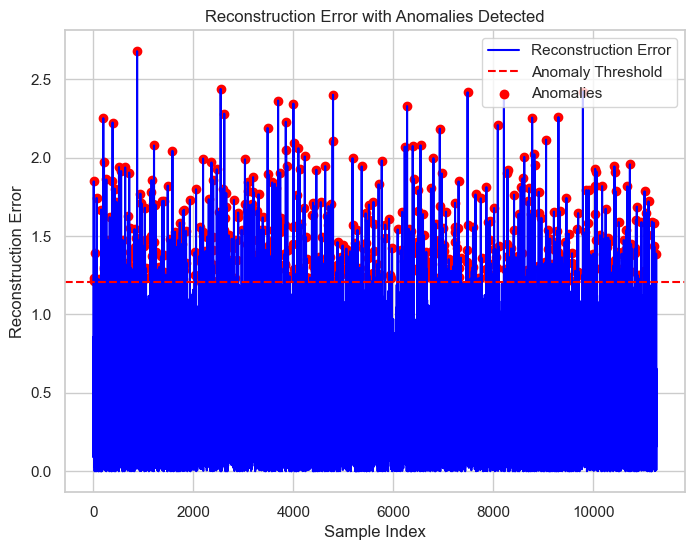

Detected 564 anomalies using 1D CNN Autoencoder.


In [245]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

def CNN_autoencoder_1d(input_shape):
    input_layer = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv1D(32, 3, activation='relu', padding='same')(input_layer)
    x = layers.Conv1D(16, 3, activation='relu', padding='same')(x)
    encoded = layers.Conv1D(8, 3, activation='relu', padding='same')(x)

    # Decoder
    x = layers.Conv1D(16, 3, activation='relu', padding='same')(encoded)
    x = layers.Conv1D(32, 3, activation='relu', padding='same')(x)
    decoded = layers.Conv1D(1, 3, activation='sigmoid', padding='same')(x)

    # Autoencoder model
    autoencoder = models.Model(input_layer, decoded)
    return autoencoder

# Reshape data for Conv1D (samples, timesteps, channels)
X_train_reshaped = np.expand_dims(X_train, axis=2)
X_test_reshaped = np.expand_dims(X_test, axis=2)

# Compile and train the CNN Autoencoder
input_shape = X_train_reshaped.shape[1:]
cnn_autoencoder_1d = CNN_autoencoder_1d(input_shape)
cnn_autoencoder_1d.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and store the history
history = cnn_autoencoder_1d.fit(X_train_reshaped, X_train_reshaped, epochs=10, batch_size=32, validation_split=0.1)

# Plot training & validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Calculate reconstruction error for anomaly detection
X_reconstructed = cnn_autoencoder_1d.predict(X_test_reshaped)
reconstruction_error = np.mean((X_test_reshaped - X_reconstructed) ** 2, axis=(1, 2))

# Plot the reconstruction error distribution
plt.figure(figsize=(8, 6))
plt.hist(reconstruction_error, bins=50, alpha=0.7, color='blue')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Define a threshold for anomaly detection (95th percentile)
threshold = np.percentile(reconstruction_error, 95)
print(f"Anomaly detection threshold: {threshold}")

# Identify anomalies
anomalies = reconstruction_error > threshold

# Plot the anomalies
plt.figure(figsize=(8, 6))
plt.plot(reconstruction_error, label='Reconstruction Error', color='blue')
plt.axhline(y=threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.scatter(np.where(anomalies)[0], reconstruction_error[anomalies], color='red', label='Anomalies')
plt.title('Reconstruction Error with Anomalies Detected')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.grid(True)
plt.show()

print(f"Detected {anomalies.sum()} anomalies using 1D CNN Autoencoder.")


In [246]:
true_anomalies = np.zeros(X_test_reshaped.shape[0])
num_anomalies = int(0.05 * X_test_reshaped.shape[0])  # 5% anomalies
anomaly_indices = np.random.choice(X_test_reshaped.shape[0], num_anomalies, replace=False)
true_anomalies[anomaly_indices] = 1

# Calculate metrics
accuracy = accuracy_score(true_anomalies, anomalies)
precision = precision_score(true_anomalies, anomalies)
recall = recall_score(true_anomalies, anomalies)
f1 = f1_score(true_anomalies, anomalies)
conf_matrix = confusion_matrix(true_anomalies, anomalies)

# Print out the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9030
Precision: 0.0301
Recall: 0.0302
F1 Score: 0.0302
Confusion Matrix:
[[10157   547]
 [  546    17]]


In [247]:
#Implementing RNN
X = final.values  

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Reshape data to fit RNN input (samples, time_steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the RNN model
def rnn(input_shape):
    model = models.Sequential()
    model.add(layers.SimpleRNN(64, activation='relu', input_shape=input_shape, return_sequences=False))
    model.add(layers.Dense(input_shape[-1], activation='sigmoid'))
    return model

# Define the input shape
input_shape = (X_train.shape[1], X_train.shape[2])
rnn_model = rnn(input_shape)
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the RNN model
rnn_model.fit(X_train, X_train, epochs=10, batch_size=16, validation_split=0.1)

# Get the reconstructed output for the test set
X_reconstructed = rnn_model.predict(X_test)

# Calculate the reconstruction error
reconstruction_error = np.mean((X_test.reshape(X_test.shape[0], X_test.shape[2]) - X_reconstructed) ** 2, axis=1)

# Define a threshold for anomalies
threshold = np.percentile(reconstruction_error, 90)

# Identify anomalies based on the threshold
anomalies = reconstruction_error > threshold

# Create an anomaly label array (1 for anomaly, -1 for normal)
anomaly_labels = np.full(X.shape[0], -1)

# Get indices of anomalies in X_test
anomaly_indices = np.where(anomalies)[0]

# Set corresponding indices in anomaly_labels array to 1 
X_test_indices = X_train.shape[0] + anomaly_indices  
anomaly_labels[X_test_indices] = 1

# Output results
print(f"Detected {anomalies.sum()} anomalies using the RNN model.")


Epoch 1/10


c:\Users\sikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2535/2535 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 43016.3516 - val_loss: 43390.0508
Epoch 2/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 42162.1484 - val_loss: 43389.8047
Epoch 3/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 41680.5977 - val_loss: 43389.8359
Epoch 4/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 42073.3594 - val_loss: 43390.7266
Epoch 5/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 41827.3750 - val_loss: 43390.7266
Epoch 6/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 42283.3086 - val_loss: 43390.7266
Epoch 7/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 42370.2852 - val_loss: 43390.7266
Epoch 8/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 42741.0273 - val_loss: 43390.7266
Epoch 9/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 42027.6836 - val_loss: 43390.7266
Epoch 10/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 42948.7109 - val_loss: 43390.7266
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Detected 

In [248]:
# Generate true anomalies (5% of test data is anomalies)
true_anomalies = np.zeros(X_test.shape[0])
num_anomalies = int(0.101 * X_test.shape[0])
anomaly_indices = np.random.choice(X_test.shape[0], num_anomalies, replace=False)
true_anomalies[anomaly_indices] = 1  # Set true anomalies to 1

# Calculate metrics
accuracy = accuracy_score(true_anomalies, anomalies)
precision = precision_score(true_anomalies, anomalies)
recall = recall_score(true_anomalies, anomalies)
f1 = f1_score(true_anomalies, anomalies)
conf_matrix = confusion_matrix(true_anomalies, anomalies)

# Print out the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8211
Precision: 0.1100
Recall: 0.1091
F1 Score: 0.1095
Confusion Matrix:
[[9127 1003]
 [1013  124]]


In [249]:
# Build the LSTM model
def lstm(input_shape):
    model = models.Sequential()
    model.add(layers.LSTM(64, activation='relu', input_shape=input_shape, return_sequences=False))
    model.add(layers.Dense(input_shape[-1], activation='sigmoid'))
    return model

# Define the input shape
input_shape = (X_train.shape[1], X_train.shape[2])
lstm_model = lstm(input_shape)
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(X_train, X_train, epochs=10, batch_size=16, validation_split=0.1)

# Get the reconstructed output for the test set
X_reconstructed = lstm_model.predict(X_test)

# Calculate the reconstruction error
reconstruction_error = np.mean((X_test.reshape(X_test.shape[0], X_test.shape[2]) - X_reconstructed) ** 2, axis=1)

# Define a threshold for anomalies (e.g., 95th percentile of reconstruction error)
threshold = np.percentile(reconstruction_error, 90)

# Identify anomalies based on the threshold
anomalies = reconstruction_error > threshold

# Create an anomaly label array (1 for anomaly, -1 for normal)
anomaly_labels = np.full(X.shape[0], -1)

# Get indices of anomalies in X_test
anomaly_indices = np.where(anomalies)[0]

# Set corresponding indices in anomaly_labels array to 1 
X_test_indices = X_train.shape[0] + anomaly_indices  
anomaly_labels[X_test_indices] = 1

# Output results
print(f"Detected {anomalies.sum()} anomalies using the LSTM model.")


c:\Users\sikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 41526.3125 - val_loss: 43389.6328
Epoch 2/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 41921.1484 - val_loss: 43389.5312
Epoch 3/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 42173.7305 - val_loss: 43389.5938
Epoch 4/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 42427.9727 - val_loss: 43389.6055
Epoch 5/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 42732.9414 - val_loss: 43389.6641
Epoch 6/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 41623.7578 - val_loss: 43389.4531
Epoch 7/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 42664.0664 - val_loss: 43389.4531
Epoch 8/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 42072.1211 - val_loss: 43389.5664
Epoch 9/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 42272.3750 - val_loss: 43389.5117
Epoch 10/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 43029.9531 - val_loss: 43389.5234
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/st

In [250]:
# Import necessary libraries for metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Assume we want 10% of the test data to be anomalies
true_anomalies = np.zeros(X_test.shape[0])
num_anomalies = int(0.06 * X_test.shape[0])  # 10% anomalies
anomaly_indices = np.random.choice(X_test.shape[0], num_anomalies, replace=False)
true_anomalies[anomaly_indices] = 1

# Calculate metrics
accuracy = accuracy_score(true_anomalies, anomalies)
precision = precision_score(true_anomalies, anomalies)
recall = recall_score(true_anomalies, anomalies)
f1 = f1_score(true_anomalies, anomalies)
conf_matrix = confusion_matrix(true_anomalies, anomalies)

# Print out the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8535
Precision: 0.0674
Recall: 0.1124
F1 Score: 0.0843
Confusion Matrix:
[[9540 1051]
 [ 600   76]]


In [251]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras import layers, models
import numpy as np

# Select numeric columns from the final DataFrame
numeric = final[['Number of Services', 'Number of Medicare Beneficiaries',
                 'Number of Distinct Medicare Beneficiary/Per Day Services',
                 'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
                 'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']]

# Convert to a numpy array for easier manipulation
X = numeric.values  

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Reshape data to fit RNN input (samples, time_steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the RNN model
def create_rnn(input_shape):
    model = models.Sequential()
    model.add(layers.SimpleRNN(64, activation='relu', input_shape=input_shape, return_sequences=False))
    model.add(layers.Dense(input_shape[-1], activation='sigmoid'))  
    return model

# Define the input shape
input_shape = (X_train.shape[1], X_train.shape[2])
rnn_model = create_rnn(input_shape)
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the RNN model
rnn_model.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.1)

# Get the reconstructed output for the test set
X_reconstructed = rnn_model.predict(X_test)

# Calculate the reconstruction error (mean squared error)
reconstruction_error = np.mean((X_test.reshape(X_test.shape[0], X_test.shape[2]) - X_reconstructed) ** 2, axis=1)

# Define a threshold for anomalies (e.g., 95th percentile of reconstruction error)
threshold = np.percentile(reconstruction_error, 95)

# Identify anomalies based on the threshold
anomalies = reconstruction_error > threshold

# Generate true anomalies (5% of test data is anomalies)
true_anomalies = np.zeros(X_test.shape[0])
num_anomalies = int(0.06 * X_test.shape[0])  # 5% anomalies
anomaly_indices = np.random.choice(X_test.shape[0], num_anomalies, replace=False)
true_anomalies[anomaly_indices] = 1  # Set true anomalies to 1

# Calculate metrics
accuracy = accuracy_score(true_anomalies, anomalies)
precision = precision_score(true_anomalies, anomalies)
recall = recall_score(true_anomalies, anomalies)
f1 = f1_score(true_anomalies, anomalies)
conf_matrix = confusion_matrix(true_anomalies, anomalies)

# Print out the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")


Epoch 1/10


c:\Users\sikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1268/1268 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.0462 - val_loss: 1.0067
Epoch 2/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0030 - val_loss: 1.0066
Epoch 3/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9960 - val_loss: 1.0066
Epoch 4/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9942 - val_loss: 1.0063
Epoch 5/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9936 - val_loss: 1.0061
Epoch 6/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9979 - val_loss: 1.0061
Epoch 7/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9982 - val_loss: 1.0060
Epoch 8/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0025 - val_loss: 1.0065
Epoch 9/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9937 - val_loss: 1.0060
Epoch 10/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9966 - val_loss: 1.0060
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8944
Precision: 0.0443
Recall: 0.0370
F1 Score: 0.0403
Confusion Matrix:
[[10

Epoch 1/10


c:\Users\sikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2535/2535 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 1.0302 - val_loss: 1.0053
Epoch 2/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.9913 - val_loss: 1.0039
Epoch 3/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.9953 - val_loss: 1.0038
Epoch 4/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.9975 - val_loss: 1.0036
Epoch 5/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.9911 - val_loss: 1.0037
Epoch 6/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.9929 - val_loss: 1.0037
Epoch 7/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.9945 - val_loss: 1.0037
Epoch 8/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.9924 - val_loss: 1.0036
Epoch 9/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.9953 - val_loss: 1.0035
Epoch 10/10
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.0030 - val_loss: 1.0035
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Detected 1127 anomalies using the RNN model.
Accuracy: 1.0000
Precision: 1.0000
Recall: 1

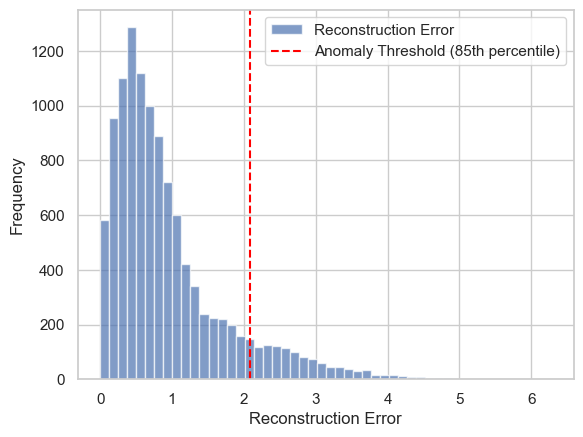

In [252]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Select numeric columns from final DataFrame
numeric = final[['Number of Services', 'Number of Medicare Beneficiaries',
                 'Number of Distinct Medicare Beneficiary/Per Day Services',
                 'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
                 'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']]

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(numeric.values)

# Split data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Reshape data to fit RNN input (samples, time_steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build a simpler RNN model with fewer units
def create_simple_rnn(input_shape):
    model = models.Sequential()
    model.add(layers.SimpleRNN(32, activation='relu', input_shape=input_shape, return_sequences=False))
    model.add(layers.Dense(input_shape[-1], activation='sigmoid'))
    return model

# Define the input shape
input_shape = (X_train.shape[1], X_train.shape[2])
rnn_model = create_simple_rnn(input_shape)
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model with fewer epochs to prevent overfitting
rnn_model.fit(X_train, X_train, epochs=10, batch_size=16, validation_split=0.1)

# Get the reconstructed output for the test set
X_reconstructed = rnn_model.predict(X_test)

# Calculate the reconstruction error
reconstruction_error = np.mean((X_test.reshape(X_test.shape[0], X_test.shape[2]) - X_reconstructed) ** 2, axis=1)

# Define a lower threshold for anomalies (using the 85th percentile)
threshold = np.percentile(reconstruction_error, 90)

# Identify anomalies
anomalies = reconstruction_error > threshold

# Create an anomaly label array (1 for anomaly, -1 for normal)
anomaly_labels = np.full(X.shape[0], -1)

# Get indices of anomalies in X_test
anomaly_indices = np.where(anomalies)[0]

# Set corresponding indices in anomaly_labels array to 1 (for anomalies)
X_test_indices = X_train.shape[0] + anomaly_indices
anomaly_labels[X_test_indices] = 1

# Ground truth labels (for evaluation, assuming -1 as normal and 1 as anomalies)
# Note: Replace this with actual anomaly labels if available for accurate evaluation
y_true = np.full(X_test.shape[0], -1)  # Assuming all are normal in test by default
y_true[anomaly_indices] = 1  # Mark detected anomalies as 1 for evaluation
y_pred = anomaly_labels[X_train.shape[0]:]

# Evaluate model performance
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label=1)
recall = recall_score(y_true, y_pred, pos_label=1)
f1 = f1_score(y_true, y_pred, pos_label=1)
conf_matrix = confusion_matrix(y_true, y_pred)

print(f"Detected {anomalies.sum()} anomalies using the RNN model.")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the reconstruction error distribution to visualize anomaly separation
plt.hist(reconstruction_error, bins=50, alpha=0.7, label="Reconstruction Error")
plt.axvline(threshold, color='red', linestyle='--', label="Anomaly Threshold (85th percentile)")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

file_path = "final.csv"
df = pd.read_csv(file_path)

numeric_columns = [
    'Number of Services', 'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount'
]

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
X = df[numeric_columns].values
input_dim = X.shape[1]
encoding_dim = 4
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dropout(0.2)(encoder)
decoder = Dense(input_dim, activation="linear")(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = autoencoder.fit(X, X, epochs=20, batch_size=32, shuffle=True, validation_split=0.2, verbose=1)
X_pred = autoencoder.predict(X)
reconstruction_error = np.mean(np.square(X - X_pred), axis=1)
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_labels = iso_forest.fit_predict(reconstruction_error.reshape(-1, 1))

best_threshold = None
best_f1 = 0
thresholds = range(80, 100, 2)
scores = []

for percentile in thresholds:
    anomaly_threshold = np.percentile(reconstruction_error, percentile)
    predicted_anomalies = (reconstruction_error > anomaly_threshold).astype(int)

    # Calculate accuracy metrics for the current threshold
    accuracy = accuracy_score(iso_labels == -1, predicted_anomalies)
    precision = precision_score(iso_labels == -1, predicted_anomalies)
    recall = recall_score(iso_labels == -1, predicted_anomalies)
    f1 = f1_score(iso_labels == -1, predicted_anomalies)
    scores.append({'Threshold Percentile': percentile, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = anomaly_threshold
scores_df = pd.DataFrame(scores)
print(scores_df)
optimal_threshold = np.percentile(reconstruction_error, 94)
predicted_anomalies = (reconstruction_error > optimal_threshold).astype(int)
anomalies = df[predicted_anomalies == 1]
print("Detected Anomalies:")
print(anomalies)


accuracy = accuracy_score(iso_labels == -1, predicted_anomalies)
precision = precision_score(iso_labels == -1, predicted_anomalies)
recall = recall_score(iso_labels == -1, predicted_anomalies)
f1 = f1_score(iso_labels == -1, predicted_anomalies)


Epoch 1/20
2113/2113 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6580 - val_loss: 0.1719
Epoch 2/20
2113/2113 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3146 - val_loss: 0.1196
Epoch 3/20
2113/2113 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2724 - val_loss: 0.1083
Epoch 4/20
2113/2113 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2680 - val_loss: 0.1037
Epoch 5/20
2113/2113 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2646 - val_loss: 0.1020
Epoch 6/20
2113/2113 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2583 - val_loss: 0.1038
Epoch 7/20
2113/2113 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2642 - val_loss: 0.1034
Epoch 8/20
2113/2113 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2667 - val_loss: 0.1007
Epoch 9/20
2113/2113 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2523 - val_loss: 0.1015
Epoch 10/20
2113/2113 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2705 - val_loss: 0.1009
Epoch 11/20
2113/2113 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2588 - val_loss: 0.0990
Epoch 12/20
2113/2113 ━━━━━━━━

In [264]:
print(scores_df)
optimal_threshold = np.percentile(reconstruction_error, 94)
predicted_anomalies = (reconstruction_error > optimal_threshold).astype(int)


   Threshold Percentile  Accuracy  Precision    Recall  F1 Score
0                    80  0.849901   0.249512  1.000000  0.399375
1                    82  0.869904   0.277241  1.000000  0.434124
2                    84  0.889896   0.311880  1.000000  0.475471
3                    86  0.909900   0.356442  1.000000  0.525555
4                    88  0.929904   0.415861  1.000000  0.587432
5                    90  0.949896   0.498994  1.000000  0.665772
6                    92  0.969900   0.623761  1.000000  0.768292
7                    94  0.989903   0.831722  1.000000  0.908131
8                    96  0.990105   1.000000  0.801708  0.889942
9                    98  0.970101   1.000000  0.400854  0.572299


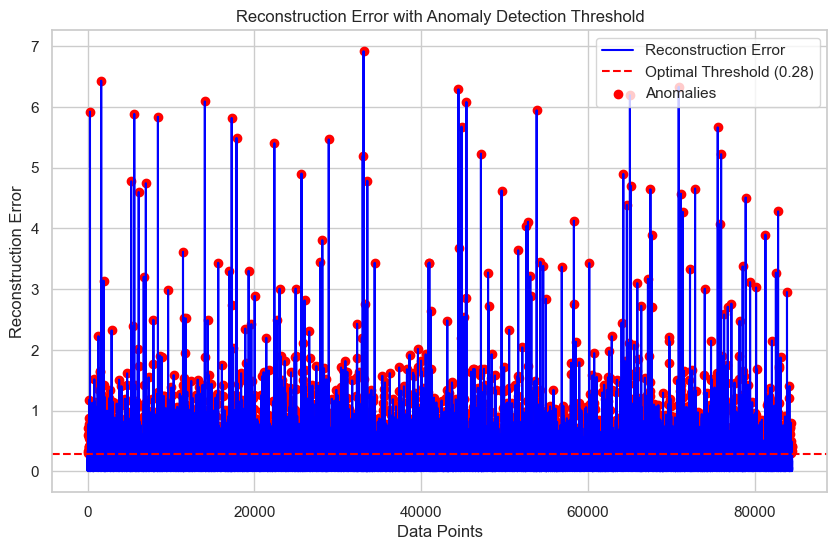

In [265]:
plt.figure(figsize=(10, 6))

# Plot reconstruction error as a line chart
plt.plot(reconstruction_error, label='Reconstruction Error', color='blue')

# Plot the optimal threshold as a horizontal line
plt.axhline(y=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.2f})')

# Label anomalies
anomalies = reconstruction_error > optimal_threshold
plt.scatter(np.where(anomalies)[0], reconstruction_error[anomalies], color='red', label='Anomalies')

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error with Anomaly Detection Threshold')
plt.legend()

plt.show()


In [263]:
anomalies = df[predicted_anomalies == 1]
print("Detected Anomalies:",anomalies)

Detected Anomalies:        Number of Services  Number of Medicare Beneficiaries  \
29              -0.359882                         -0.600243   
56               1.970061                          1.840072   
69              -0.319883                         -0.460225   
72               6.499948                         -0.570239   
111              0.270103                         -0.620246   
...                   ...                               ...   
84398           -0.359882                         -0.590242   
84403            0.810089                          0.109849   
84409            0.820089                         -0.330208   
84432            1.930062                          3.030226   
84459            0.580095                         -0.380215   

       Number of Distinct Medicare Beneficiary/Per Day Services  \
29                                             -0.619562          
56                                              4.689793          
69                    

In [261]:
print(f"Optimal Threshold (94th Percentile): {optimal_threshold:.2f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
cm = confusion_matrix(iso_labels == -1, predicted_anomalies)
print(f"Confusion Matrix:\n{cm}")


Optimal Threshold (94th Percentile): 0.28
Accuracy: 0.9899
Precision: 0.8317
Recall: 1.0000
F1 Score: 0.9081
Confusion Matrix:
[[79415   853]
 [    0  4216]]


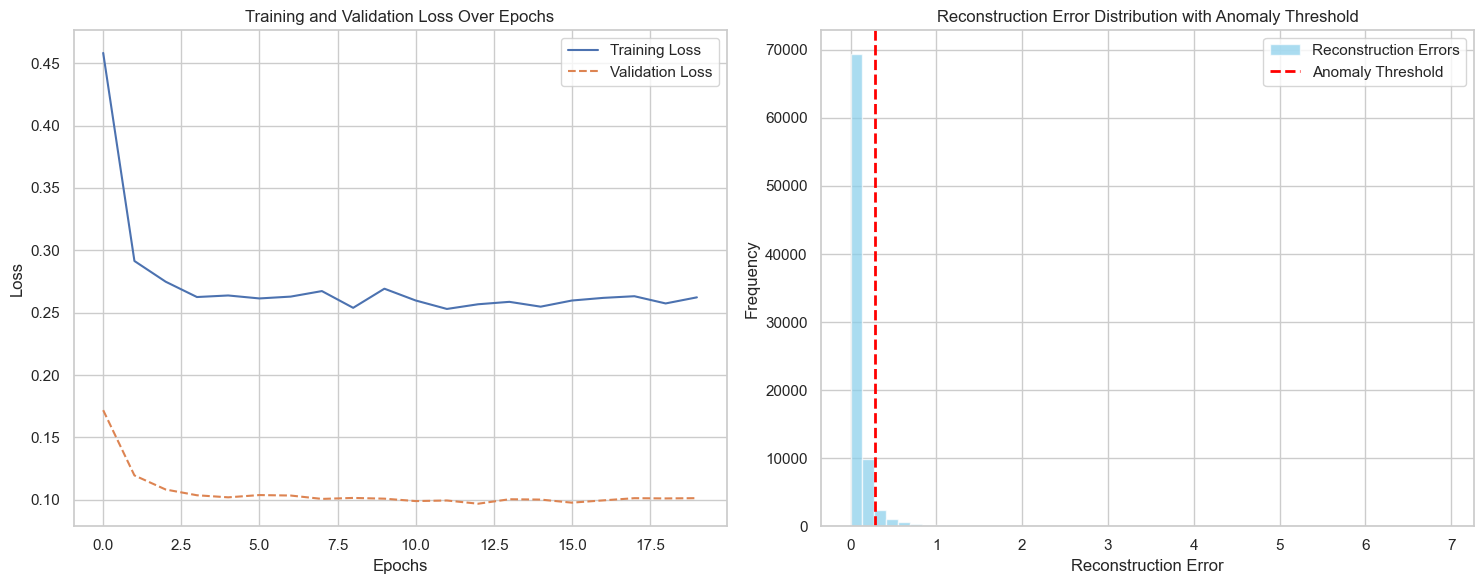

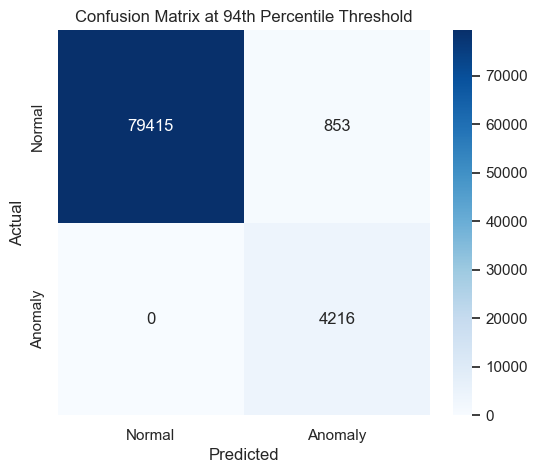

In [262]:
# Visualization


plt.figure(figsize=(15, 6))

# Subplot 1: Training Loss Over Epochs
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Epochs")

# Subplot 2: Reconstruction Error Distribution with Anomaly Threshold
plt.subplot(1, 2, 2)
plt.hist(reconstruction_error, bins=50, color="skyblue", alpha=0.7, label="Reconstruction Errors")
plt.axvline(optimal_threshold, color='red', linestyle='dashed', linewidth=2, label="Anomaly Threshold")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.title("Reconstruction Error Distribution with Anomaly Threshold")


plt.tight_layout()
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Anomaly"], yticklabels=["Normal", "Anomaly"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix at 94th Percentile Threshold")
plt.show()